## Global Power Plant Database Project

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df=pd.read_csv(r'D:\Files\database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This data frame contains database of to **Global Power Plant**. It contains **907 rows and 27 columns** out of which **25 columns are inputs** and **2 columns are target variable** i.e. **'capacity_mw' and 'primary_fuel' column**.  
  
The data frame contains both  **numeric and catagorical data.**  
  
We are going to treat **'capacity_mw' as Target variable** and **rest of the columns as inputs.**  
  
**'capacity_mw' column has numeric data,** thus it represents **Regression Problem**.  
  
***The goal is to predict 'capacity_mw'.***   

In [3]:
df.columns#checking columns of data frame

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
#Checking data type of columns
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

There are **two types** of data present in this data frame which are **'object' and  'float64**'. **Most** of the data types are **'float64'**.

In [5]:
#checking for whitespace characters in columns of data frame
col=df.columns.tolist() #Storing columns name as list in 'col' variable

space=''#Initilizing empty 'space' variable
validation=0#Initilizaing variable

for i in col:#Iterating through columns
    
    for a in range(1,11): #Iterating for 10 number of times i.e. it can detect upto 10 number of whitespaces per row
        space+=' ' #Incrementing one white space character per iteration
        
        if not df.loc[df[i]==space].empty:#Checking if any row contains white space characters
            
            validation+=1#increasing 1 in 'validation' variable
            
            print(f'There are white space characters present in {i} Column with length of  {len(space)}  white space characters')#Printing if a column contains white space character along with number of  white space characters present in a single row(Note:It does not print total number of white space characters present in a column)
            
    space=''#Reseting 'space' variable
    
if validation==0:#Using 'if' to check whether 'validation' variable's value matches to '0' or not.
    print('This data frame does not contains any whitespace characters.')

This data frame does not contains any whitespace characters.


In [6]:
df.isnull().sum() #Checking if null values are present in data frame 

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

**All of these columns** contains **null values except** for **'country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw', 'primary_fuel', 'source' and 'url'** columns.  
  
**All values** in **'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019' and 'estimated_generation_gwh'** columns are **null values** thus, **they can be dropped.**

In [7]:
a=['other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019' , 'estimated_generation_gwh']#creating list

df.drop(a,axis=1,inplace=True)#dropping columns

df.isnull().sum() #checking null values

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               906
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

Columns are dropped successfully.

In [8]:
df.shape#checking shape of data frame

(907, 22)

Now the data frame has **22 columns** out of which 21 columns are inputs and 1 columns is target variable.

In [9]:
null_col=[]#creating empty list

col=df.columns.to_list() #updating columns

for i in col:#iterating through 'col' list
    
    if df[i].isnull().sum()!=0:#using if condition to check for columns which contains null values
        null_col.append(i)#appending columns

In [10]:
for i in null_col:#iterating through 'null_col' list
        
        if df[i].dtype=='object':#using if condition to check whether the data type of column is 'object' or not
            
            mode=df[i].mode()[0]#fetching mode 
            
            print(f'Using mode value "{mode}" of "{i}" column\n')#printing
        
            df[i].fillna(mode,inplace=True)#replacing NaN values
        
        
        elif df[i].dtype=='float64':#using elif condition to check whether the data type of column is 'float64' or not
            
            mean=df[i].mean()#fetching mean
            
            print(f'Using mean value "{mean}" of "{i}" column\n')#printing
            
            df[i].fillna(mean,inplace=True)#replacing NaN values

Using mean value "21.1979181184669" of "latitude" column

Using mean value "77.46490720092916" of "longitude" column

Using mode value "Oil" of "other_fuel1" column

Using mode value "Oil" of "other_fuel2" column

Using mean value "1997.0910815939278" of "commissioning_year" column

Using mode value "Acc Acc ltd" of "owner" column

Using mode value "WRI" of "geolocation_source" column

Using mean value "2019.0" of "year_of_capacity_data" column

Using mean value "2431.823590196343" of "generation_gwh_2014" column

Using mean value "2428.2269459614085" of "generation_gwh_2015" column

Using mean value "2467.9368586349096" of "generation_gwh_2016" column

Using mean value "2547.7593045102053" of "generation_gwh_2017" column

Using mean value "2600.804098662014" of "generation_gwh_2018" column

Using mode value "Central Electricity Authority" of "generation_data_source" column



NaN values are replaced successfully. 

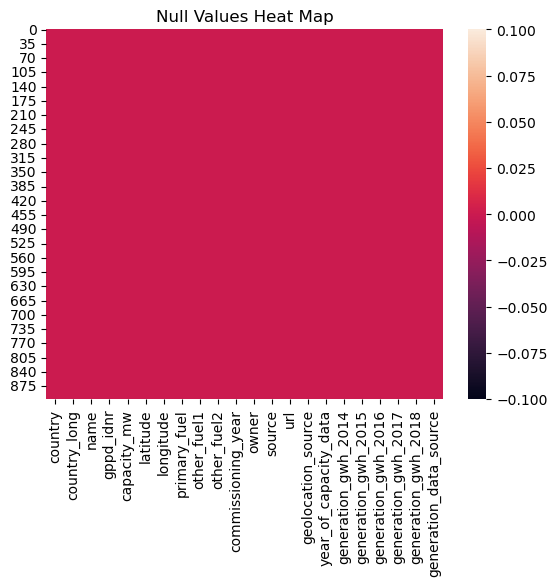

In [11]:
sb.heatmap(df.isnull())#Visualizing null values via Heatmap
plt.title('Null Values Heat Map')
plt.show()

We can confirm that now this **data frame does not have null values present in it.**

In [12]:
#creating a function named 'dup' to check for duplicate values in data frame

def dup(x):#takes one argument i.e variable which stores data frame
    
    a=x.duplicated().sum()#storing sum of duplicate values in 'a' variable
    
    if a==0:#first condition
        print('This data frame does not contains duplicate values.')#printing
    
    elif a==1:#second condition
        print('There is only 1 duplicate value present in the data frame.')#printing
    
    else:
        print(f'Total duplicate values present in DataFrame are {x.duplicated().sum()}.')#printing
    
dup(df)

This data frame does not contains duplicate values.


In [13]:
df.info()#Checking more information related to data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             907 non-null    object 
 9   other_fuel2             907 non-null    object 
 10  commissioning_year      907 non-null    float64
 11  owner                   907 non-null    object 
 12  source                  907 non-null    object 
 13  url                     907 non-null    object 
 14  geolocation_source      907 non-null    ob

This shows **information** related to the **columns** and about their **Non-null count** and **Dtype.** It also shows the memory usage , which is **156.0+ KB** in this case.

In [14]:
#fetching details of columns, such as Unique values, Number of unique values and their value counts 
for i in col:#Iterating through 'col' variable
    print('\n',i,':-\nUnique values:',df[i].unique(),'\nNumber of unique values:',df[i].nunique(),'\n\n',df[i].value_counts().to_frame('Value Counts'))#Printing


 country :-
Unique values: ['IND'] 
Number of unique values: 1 

      Value Counts
IND           907

 country_long :-
Unique values: ['India'] 
Number of unique values: 1 

        Value Counts
India           907

 name :-
Unique values: ['ACME Solar Tower' 'ADITYA CEMENT WORKS' 'AES Saurashtra Windfarms'
 'AGARTALA GT' 'AKALTARA TPP' 'AKRIMOTA LIG' 'ALIYAR' 'ALLAIN DUHANGAN'
 'ALMATTI DAM' 'AMAR KANTAK' 'AMARAVATI TPP' 'ANANDPUR SAHIB ST-I&II'
 'ANAPARA "C"' 'ANDHRA' 'ANOOPGARH ST I&II' 'ANPARA' 'ANTA GT' 'ANUPPUR'
 'ANUPUR TPP' 'ARVINDNAGAR SUGAR' 'ASHOKNAGAR MILL' 'ATHANI SUGAR'
 'AURAIYA GT' 'AVANTHA BHANDAR TPP' 'AWARPUR CEMENT PLANT' 'Abhijeet'
 'Amarsar Solar Power Plant' 'Anabura Wind Farm'
 'Ananthapur - Meil Solar Power Plant' 'Andrha Lake Wind Farm'
 'Anikkadavu Wind Farm' 'Arasinagundi Wind Farm'
 'Askandra - DREPL Solar Power Plant'
 'Askandra - Electromech Maritech Solar Power Plant'
 'Askandra - Finehope Solar Power Plant'
 'Askandra - Khaya Solar Power Plant'
 'Aska

This gives a breif information about **unique values, count of unique values and value counts** of each column present in the data frame.  
**All values** present in **'country', 'country_long', 'other_fuel2', 'year_of_capacity_data' and 'generation_data_source'** features are **same**, thus, they **can be dropped.**  
**All values** present in **'name' and 'gppd_idnr'** features are unique, and as it contains catagorical data, we can drop it.


In [15]:
a=['country', 'country_long', 'other_fuel2', 'year_of_capacity_data','generation_data_source','name','gppd_idnr']#creating list

df.drop(a,axis=1,inplace=True)#dropping columns

df.columns#checking columns of data frame

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

columns are dopped sucessfully.

In [16]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,Oil,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,Wind,Oil,1997.091082,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


Now the data frame contains **15 columns** out of which 14 columns are inputs and 1 column is target variable i.e. 'capacity_mw' column.

In [17]:
df.to_csv(r'D:\Files\R-GPP_Database.csv',index=False)#exporting data frame as csv 

In [18]:
df.describe()#Using describe function on data frame

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


This gives the statistical information of the numerical columns. From the above description we can observe the following:   
1)There are no missing values.    
2)Mean is oddly greater than 50% in **'capacity_mw'** feature which means that these data **might** be **skewed to the right** in this feature.    
3)There is huge jump between max and 75% in **'capacity_mw', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017',  and 'generation_gwh_2018'** features which means that there **might** be **outliers present** in these features.

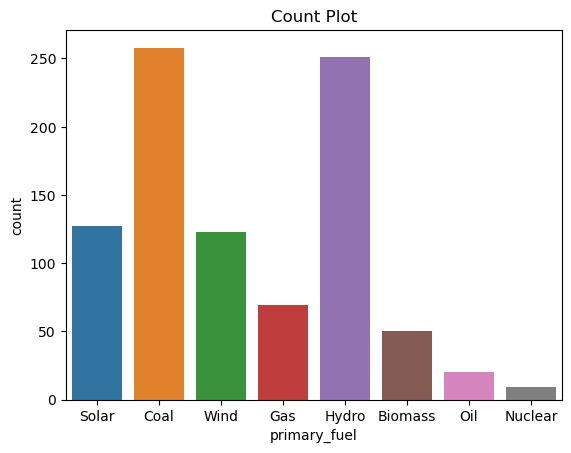

In [19]:
#checking count of values present in 'primary_fuel' column
sb.countplot(data=df,x='primary_fuel')
plt.title('Count Plot')
plt.show()

**Most** of the primary fuel type are **'Coal' and 'Hydro'**.**'Coal'** is **little bit high** than **'Hydro'** type primary fuel. 

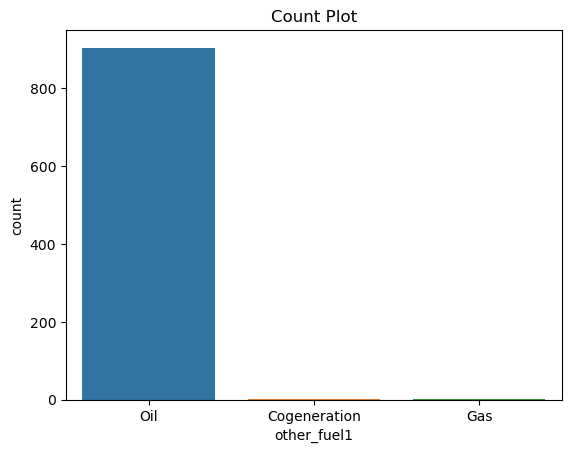

In [20]:
#checking count of values present in 'other_fuel1' column
sb.countplot(data=df,x='other_fuel1')
plt.title('Count Plot')
plt.show()

**Almost all** of the **'other_fuel1'** are **'Oil'**.

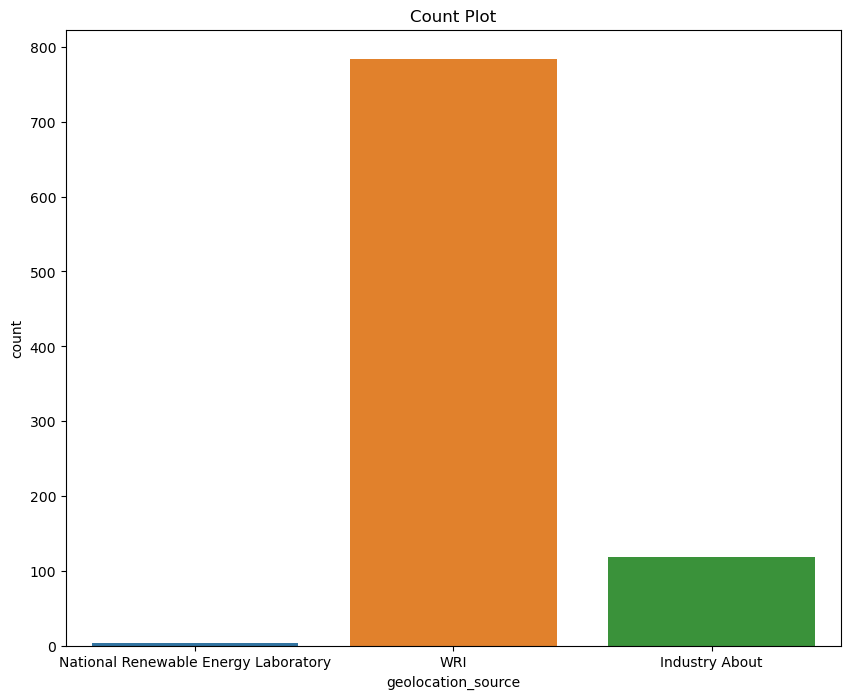

In [21]:
#checking count of values present in 'geolocation_source' column
plt.figure(figsize=(10,8))
sb.countplot(data=df,x='geolocation_source')
plt.title('Count Plot')
plt.show()

**Majority** of the geolocation source is **'WRI'**.

In [22]:
col=df.columns.to_list()#updating 'col' variable

#creating empty list
num_c=[]
cat_c=[]

for i in col:#iterating through 'col' variable 
    
    if df[i].dtypes=='float64':#using if condition to execute the following code only if the columns contains numeric values
        num_c.append(i)#appending 'i' in 'num_c' list

    elif df[i].dtypes=='object':#using if condition to execute the following code only if the columns contains catagorical values
        cat_c.append(i)#appending 'i' in 'cat_c' list

log=[]#creating empty list which is stored in 'log' variable 

def re():#creating a function named 're'
    
    for i in num_c:#iterating through 'num_c' variable
        if i not in log:#using if condition to plot graphs
            sb.lmplot(data=df,x=log[-1],y=i)
            plt.title('Linear Model Plot')
    plt.show()

In [23]:
num_c#checking contents of 'num_c' list

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

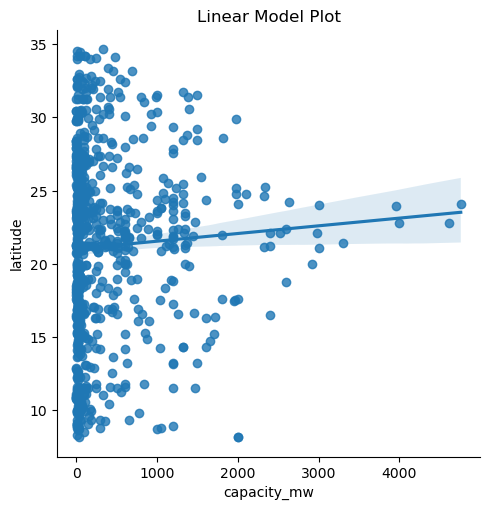

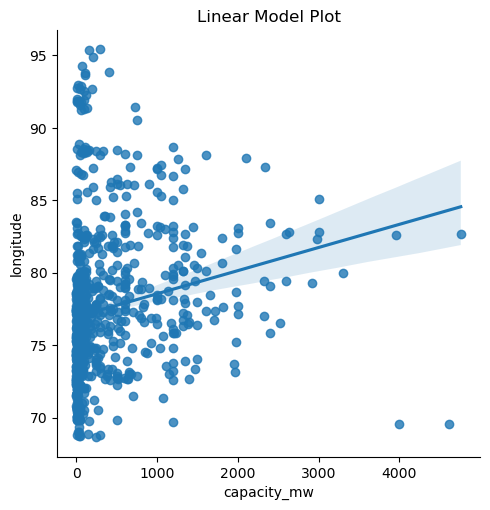

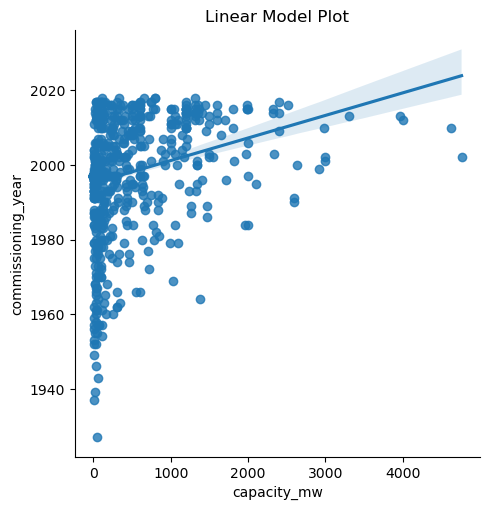

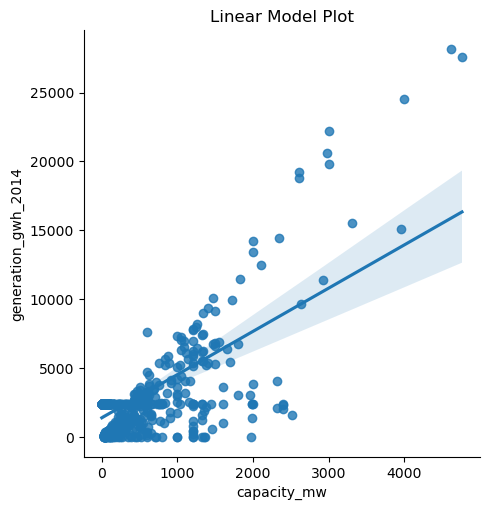

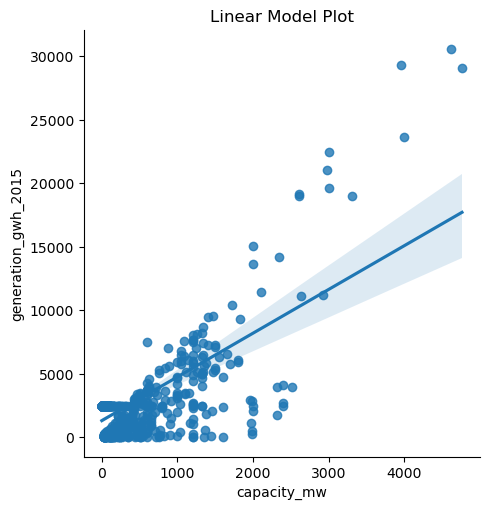

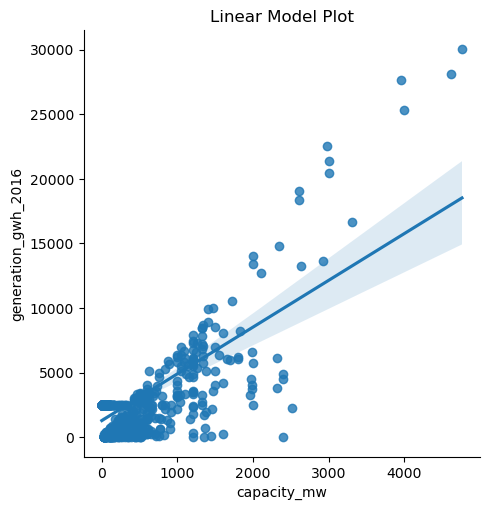

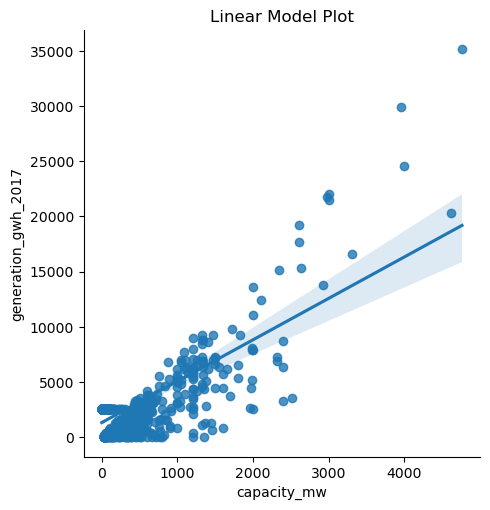

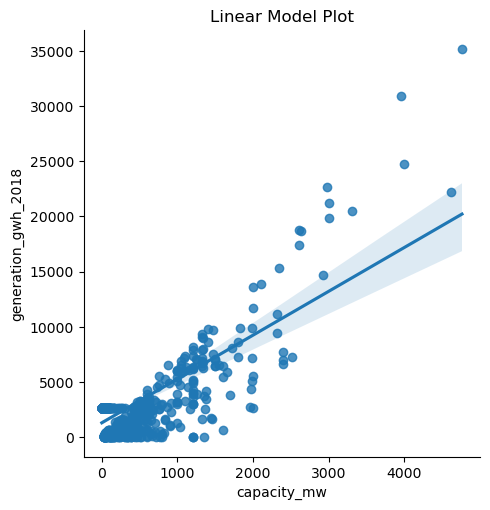

In [24]:
#checking linear relation of 'capacity_mw' column with other features 
log.append('capacity_mw')#Appending column
re()#calling function

**'capacity_mw'** column has **low positive linear relation** with **'latitude' and 'longitude'** features, and **high positive linear relation** with **'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'** features.

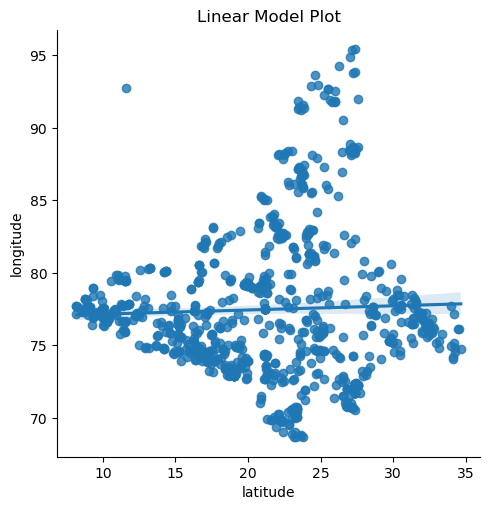

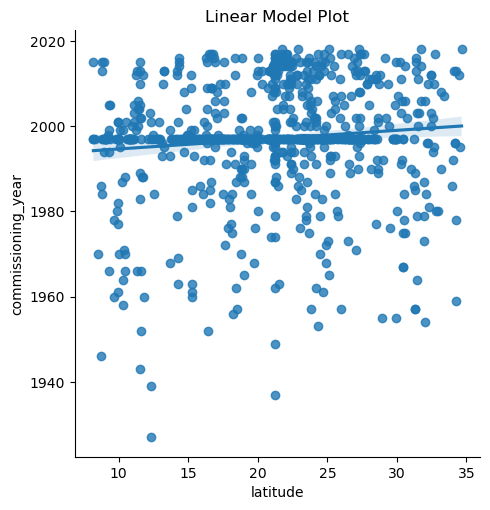

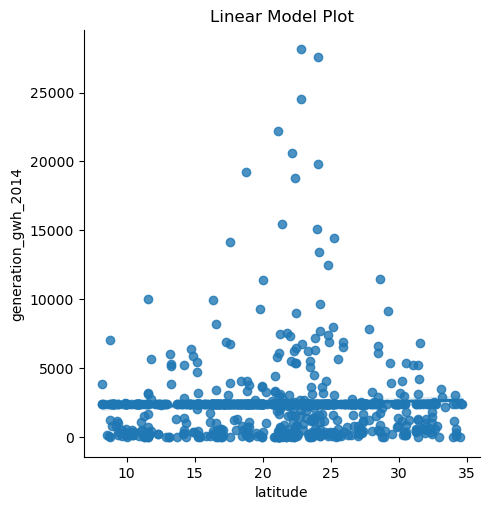

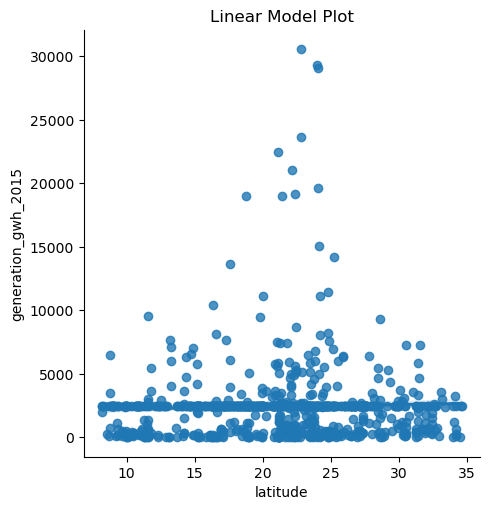

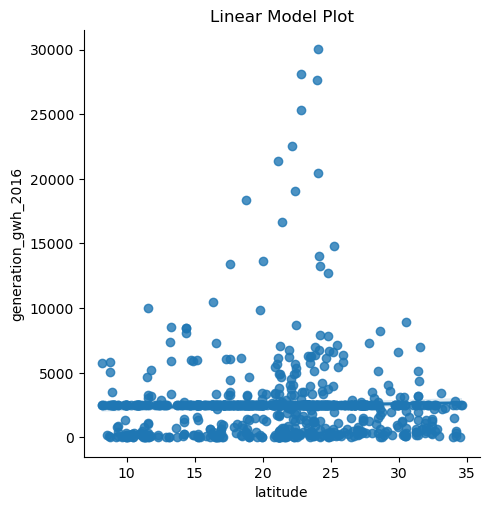

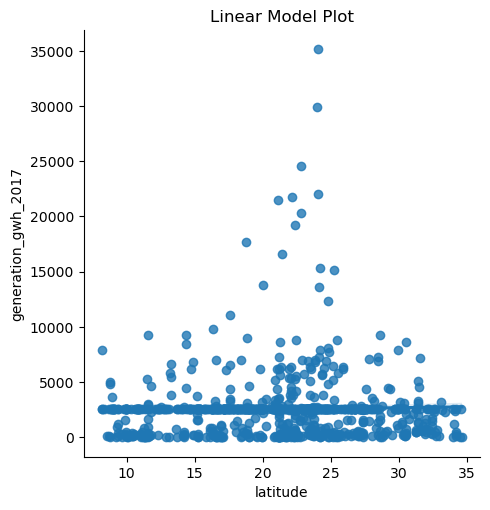

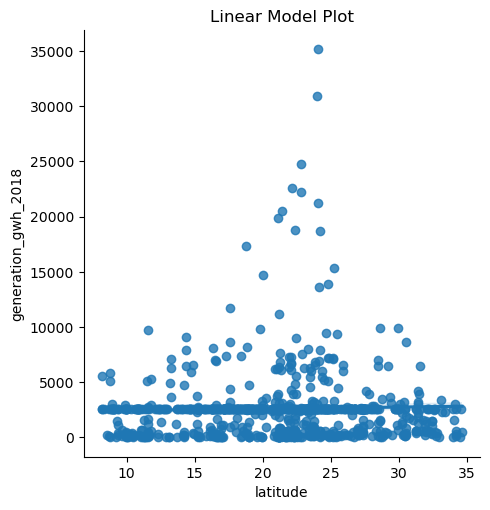

In [25]:
#checking linear relation of 'latitude' feature with other features 
log.append('latitude')#Appending column
re()#calling function

**'latitude'** feature has **almost no linear relation** with **other remaining features.**

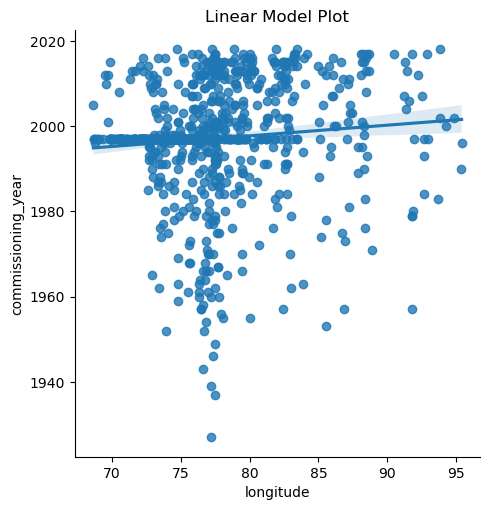

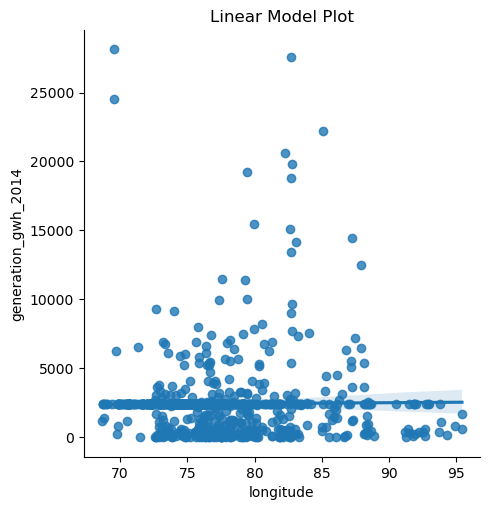

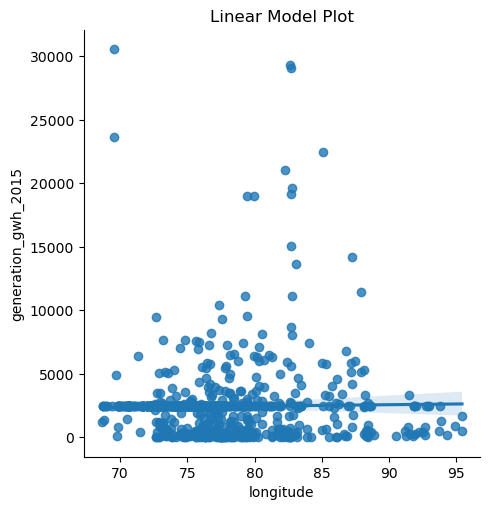

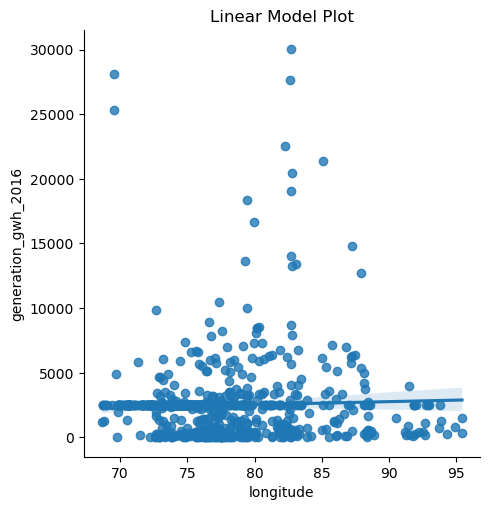

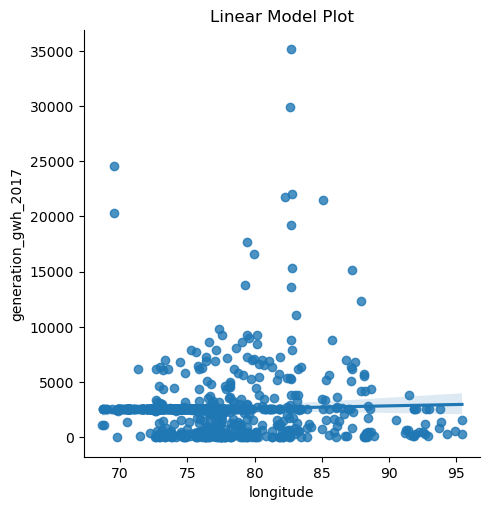

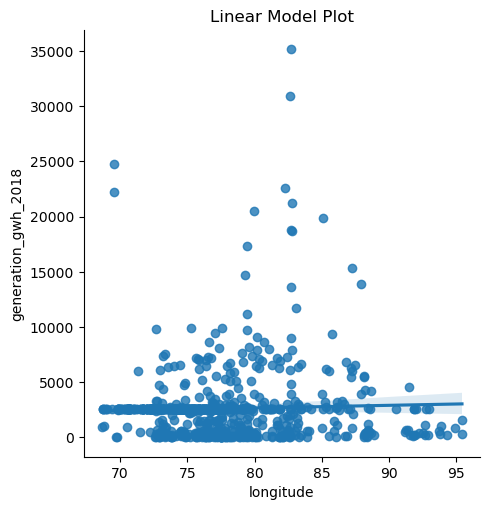

In [26]:
#checking linear relation of 'longitude' feature with other features 
log.append('longitude')#Appending feature
re()#calling function

**'longitude'** feature has **almost no linear relation** with **other remaining features.**

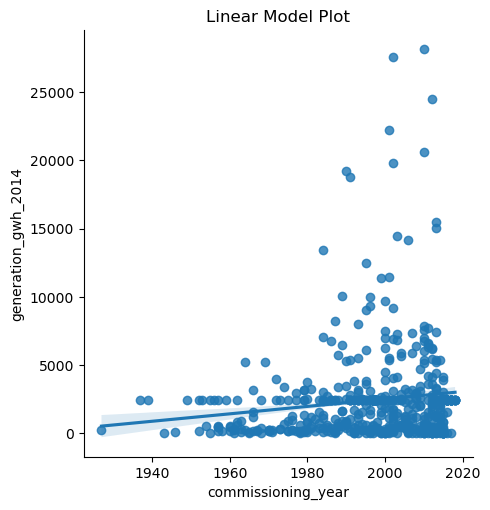

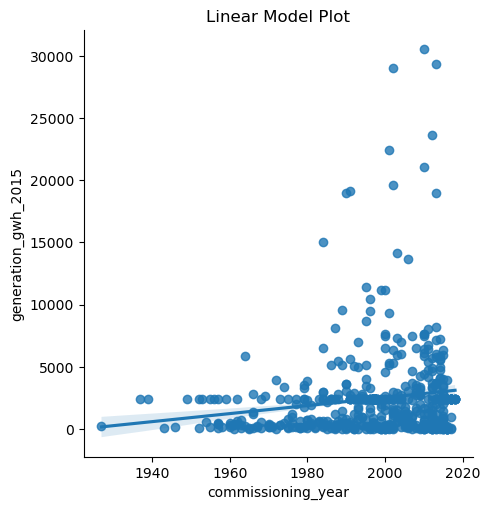

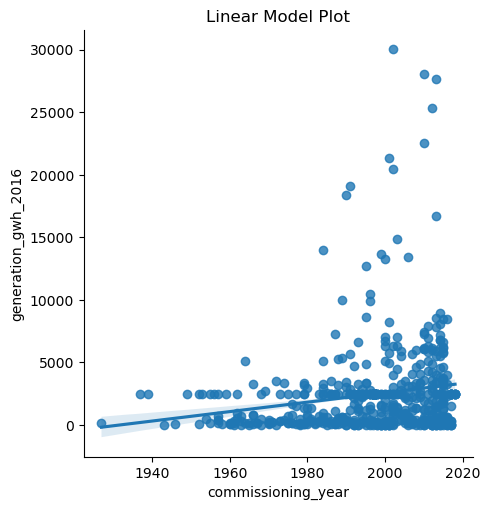

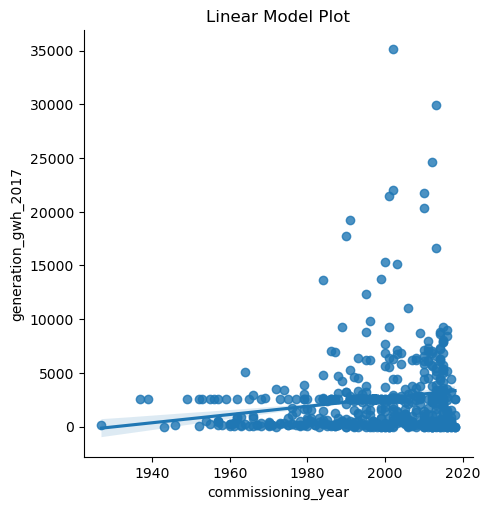

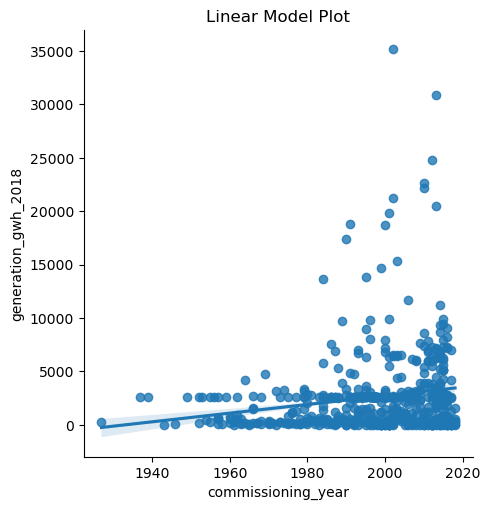

In [27]:
#checking linear relation of 'commissioning_year' feature with other features 
log.append('commissioning_year')#Appending feature
re()#calling function

**'commissioning_year'** has **low positive linear relation** with **'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'** features.

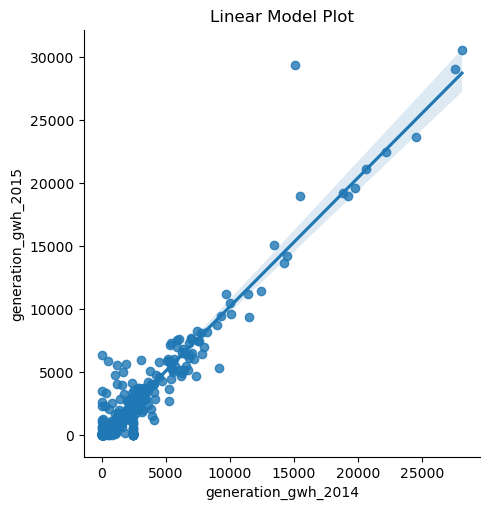

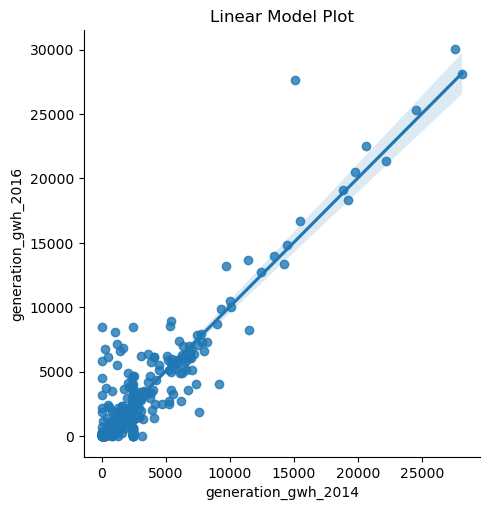

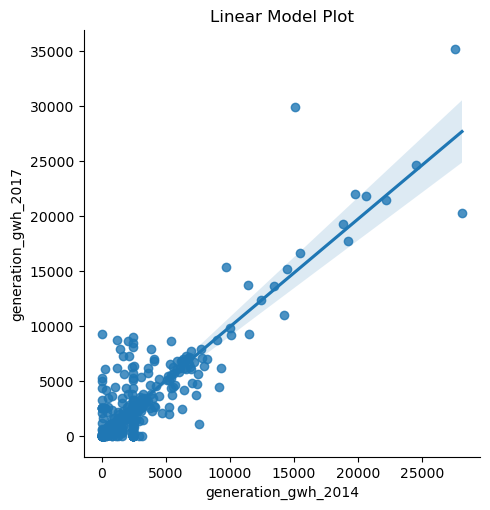

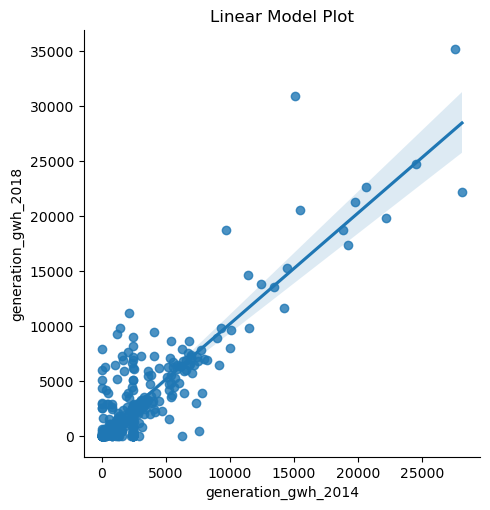

In [28]:
#checking linear relation of 'generation_gwh_2014' feature with other features 
log.append('generation_gwh_2014')#Appending feature
re()#calling function

**'generation_gwh_2014'** feature has **high positve linear relation** with the **remaining features**.

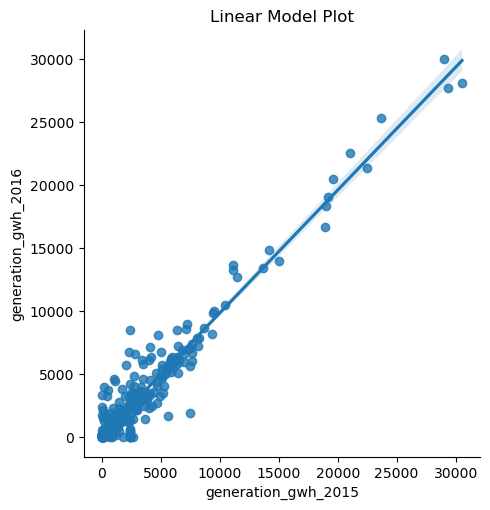

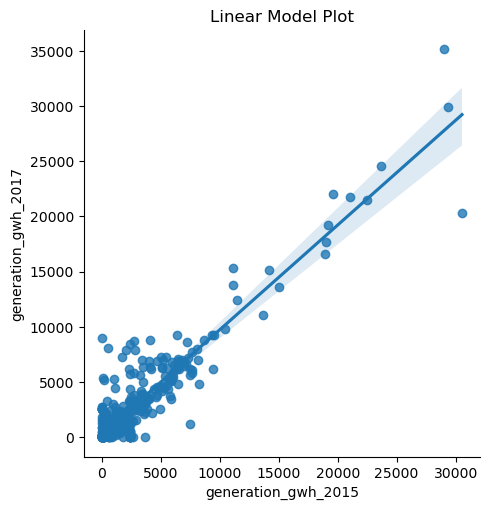

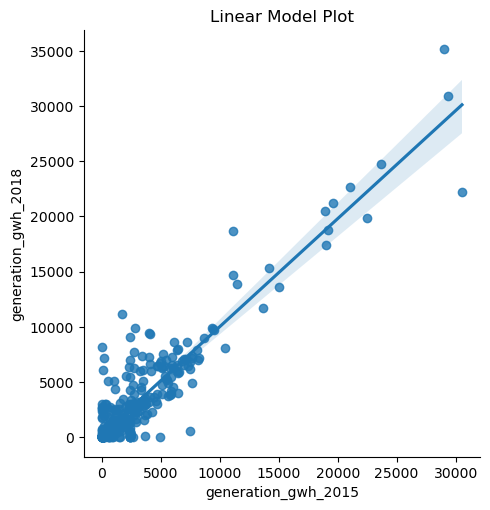

In [29]:
#checking linear relation of 'generation_gwh_2015' feature with other features 
log.append('generation_gwh_2015')#Appending feature
re()#calling function

**'generation_gwh_2015'** feature has **high positve linear relation** with the **remaining features**.

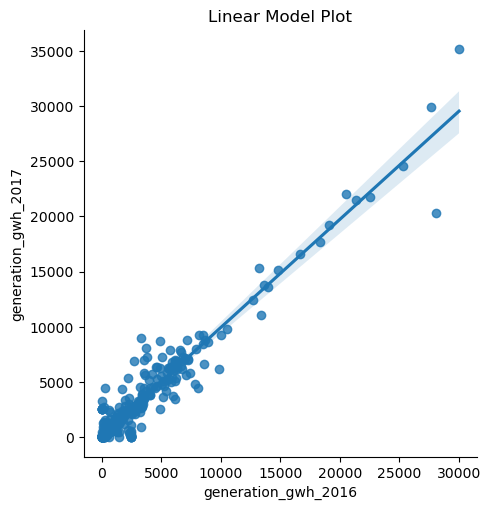

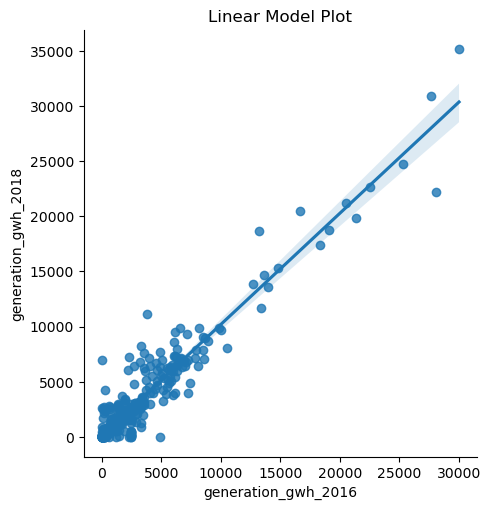

In [30]:
#checking linear relation of 'generation_gwh_2016' feature with other features 
log.append('generation_gwh_2016')#Appending feature
re()#calling function

**'generation_gwh_2016'** feature has **high positve linear relation** with the **remaining features**.

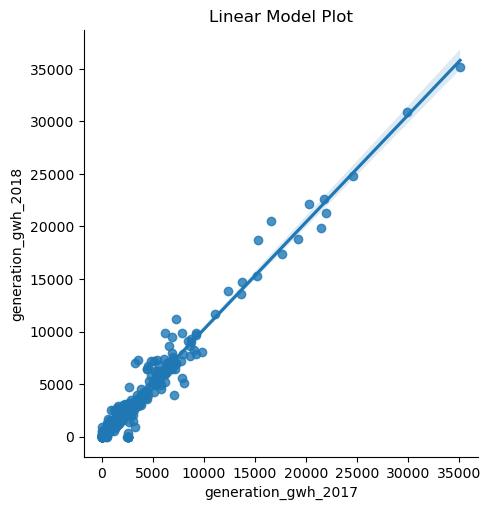

In [31]:
#checking linear relation between  'generation_gwh_2017' and 'generation_gwh_2018' features
log.append('generation_gwh_2017')#Appending feature
re()#calling function

**'generation_gwh_2017' and 'generation_gwh_2018'** feature has **high positve linear relation**  between them.

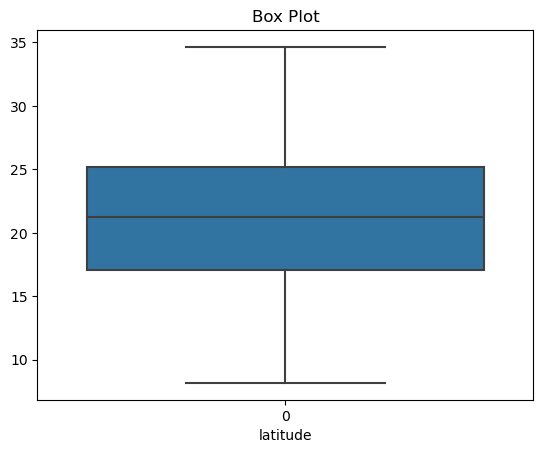

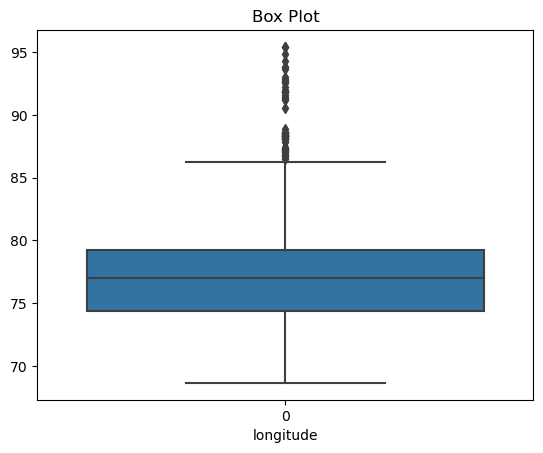

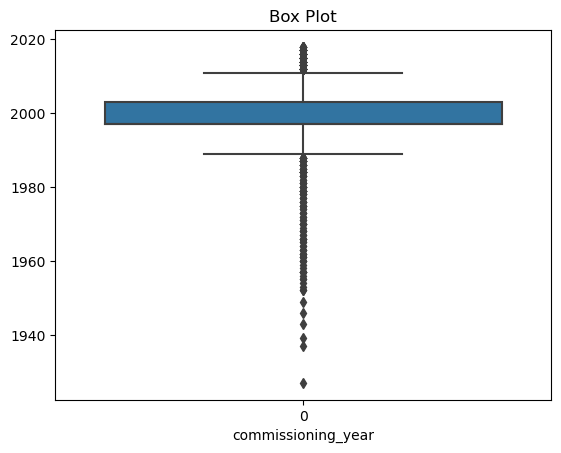

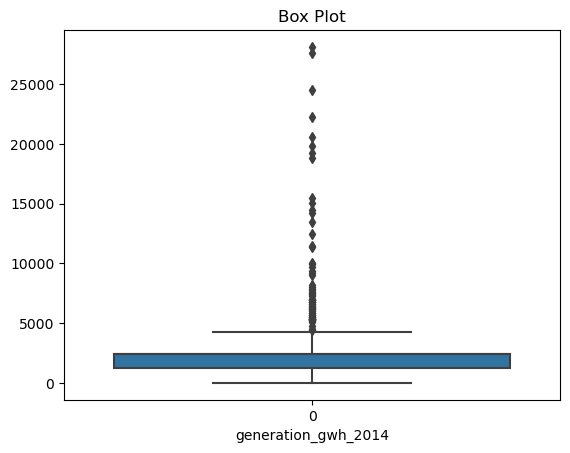

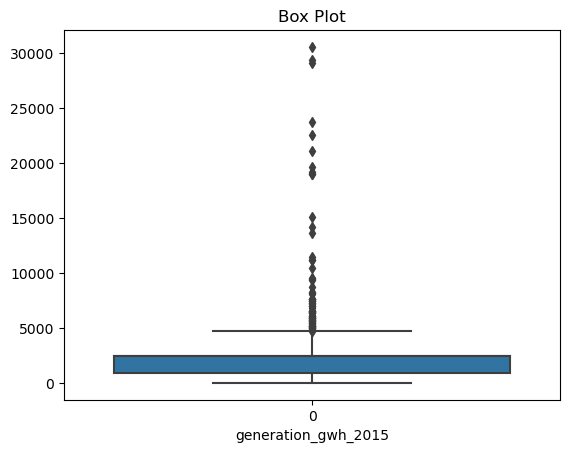

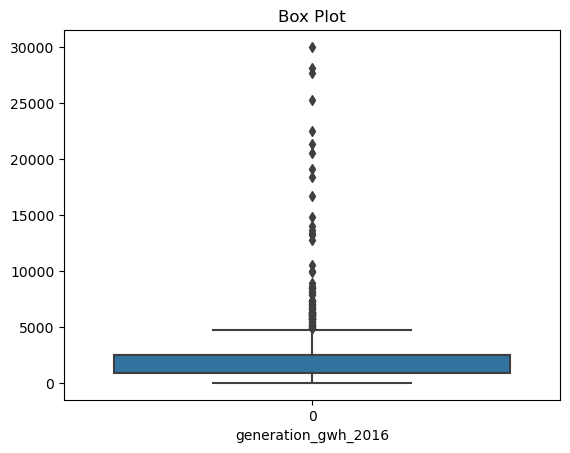

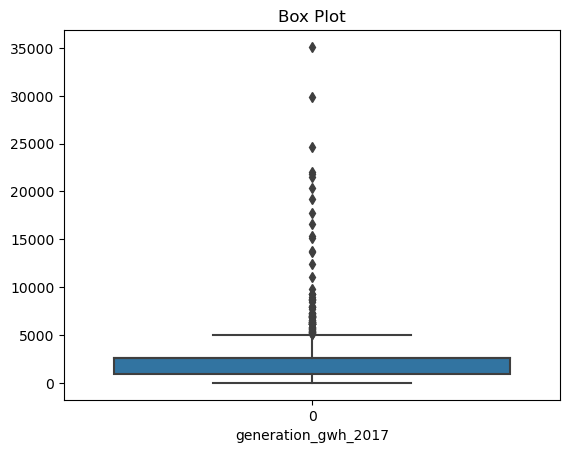

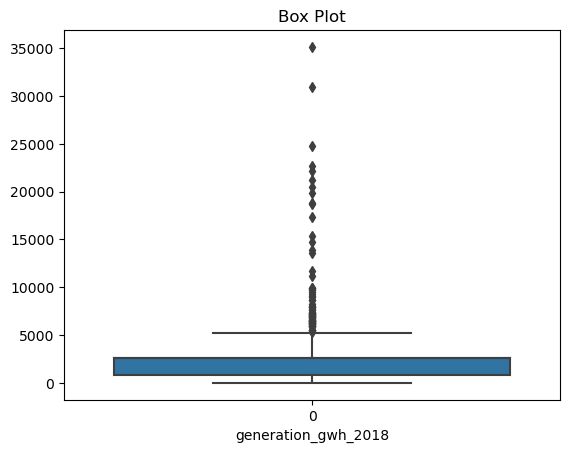

In [32]:
#Checking outliers via Box Plot
out=list(num_c)#creating new list with same data as 'num_c'

out.remove('capacity_mw')#removing target variable from the list

for i in out:
    sb.boxplot(df[i])
    plt.xlabel(i)
    plt.title('Box Plot')
    plt.show()

**All of these features** contains outliers **except** for **'latitude'** feature.

In [33]:
#removing outliers using zscore method
#Importing necessary libraries
from scipy.stats import zscore as zs

out.remove('latitude')#removing 'latitude' feature from the list

f_outlier=df[out]
z=np.abs(zs(f_outlier))
z

,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.878280,1.069162e+00,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
1,0.593788,1.747794e-14,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
2,1.682394,1.747794e-14,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
3,2.889052,5.310801e-01,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,1.027976,1.376637e+00,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00
...,...,...,...,...,...,...,...
902,0.022477,1.453505e+00,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01
903,0.145644,1.747794e-14,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
904,0.391673,1.747794e-14,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
905,0.772866,1.747794e-14,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16


The **variable 'z'** holds the **zscores values** of these features.

In [34]:
#checking outliers as per the threshold value as '3'
np.where(z>3)

(array([ 15,  15,  15,  15, 143, 143, 143, 143, 143, 158, 179, 183, 209,
        209, 209, 209, 209, 222, 244, 308, 308, 308, 308, 308, 323, 333,
        340, 342, 360, 364, 364, 364, 364, 364, 371, 416, 427, 444, 454,
        478, 484, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494, 499,
        519, 538, 541, 546, 573, 577, 583, 592, 601, 621, 638, 648, 648,
        648, 648, 648, 657, 657, 657, 657, 657, 695, 695, 695, 695, 695,
        706, 709, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726, 726,
        726, 726, 726, 728, 786, 786, 786, 786, 786, 807, 808, 808, 808,
        808, 808, 818, 847, 848, 880, 880, 880, 880, 880], dtype=int64),
 array([3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 0, 0, 2, 3, 4, 5, 6, 1, 0, 2, 3, 4,
        5, 6, 0, 0, 0, 1, 0, 2, 3, 4, 5, 6, 1, 0, 0, 1, 1, 1, 1, 2, 3, 4,
        5, 6, 2, 3, 4, 5, 6, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 3, 4,
        5, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 1, 1, 2, 3, 4, 6, 2, 3, 4, 5,
        6, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 

In [35]:
#checking value of the outliers
z.iloc[15,3]

3.0523223040496053

In [36]:
z.iloc[15,4]

3.740709931709165

In [37]:
z.iloc[15,6]

5.314006233593946

In [38]:
z.iloc[15,5]

4.379312802119109

We can confirm that these values holds outlier as per the threshold value.

In [39]:
#Removing outliers 
zscore=df[(z<3).all(axis=1)]#storing values in 'zscore' variable

In [40]:
#Using IQR method to remove outliers from the original data frame
q1=f_outlier.quantile(.25)
q3=f_outlier.quantile(.75)
iqr=q3-q1
IQR=df[~((df< (q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]

In [41]:
print('Data loss percentage after removing outliers via zscore method',((df.shape[0]-zscore.shape[0])/df.shape[0])*100)
print('Data loss percentage after removing outliers via IQR method',((df.shape[0]-IQR.shape[0])/df.shape[0])*100)

Data loss percentage after removing outliers via zscore method 5.733186328555679
Data loss percentage after removing outliers via IQR method 37.92723263506063


We can observe that **zscore method performed well** than IQR method, hence, we will **update** the data frame with **zscore method.**

In [42]:
outliers=df.shape[0]-zscore.shape[0]#storing number of outliers removed in 'outliers' variable

print(f'Outliers removed : {outliers}')#printing
df=zscore#Updating data frame

Outliers removed : 52


In [43]:
df.shape#checking shape of data frame

(855, 15)

Now the data frame has **855 rows.**

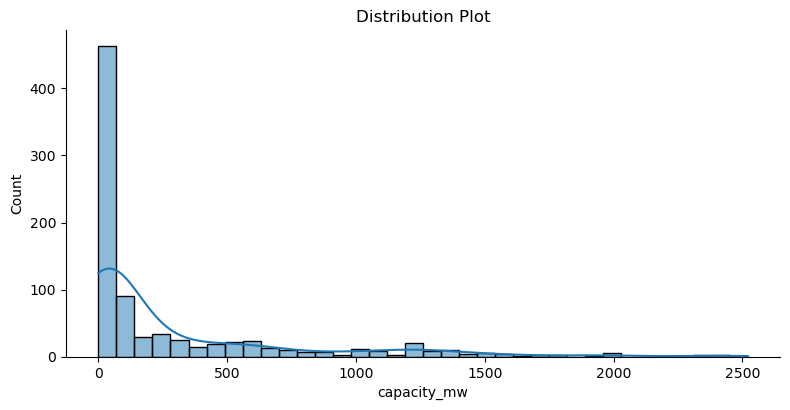

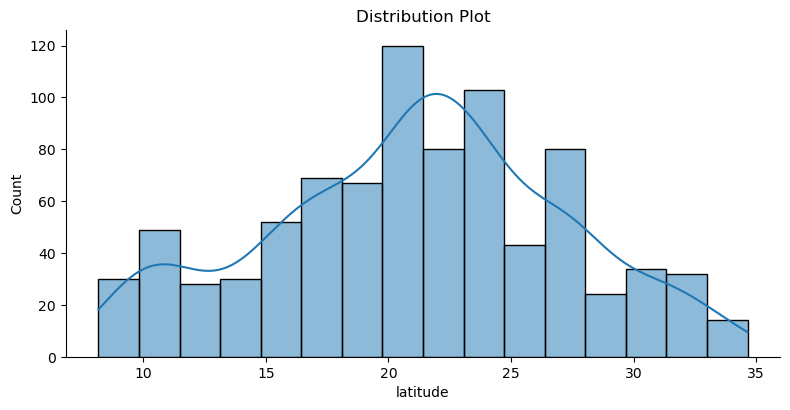

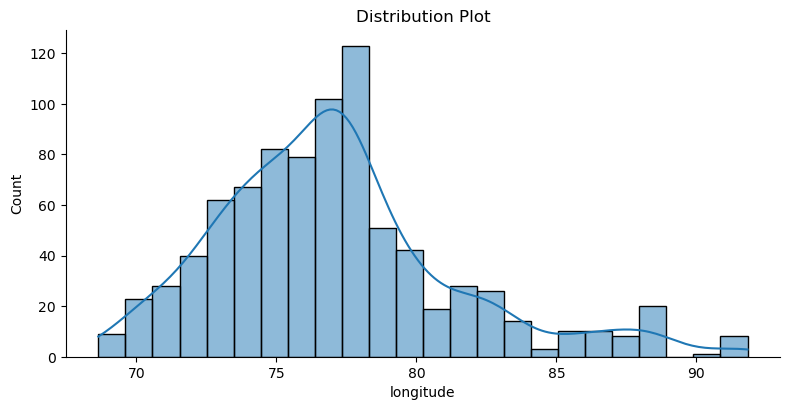

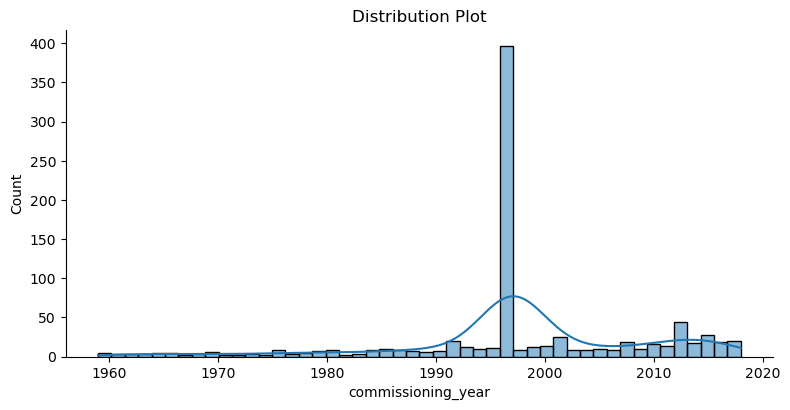

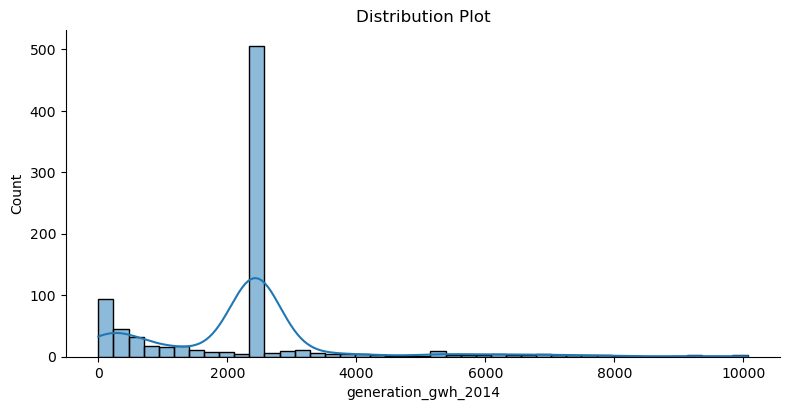

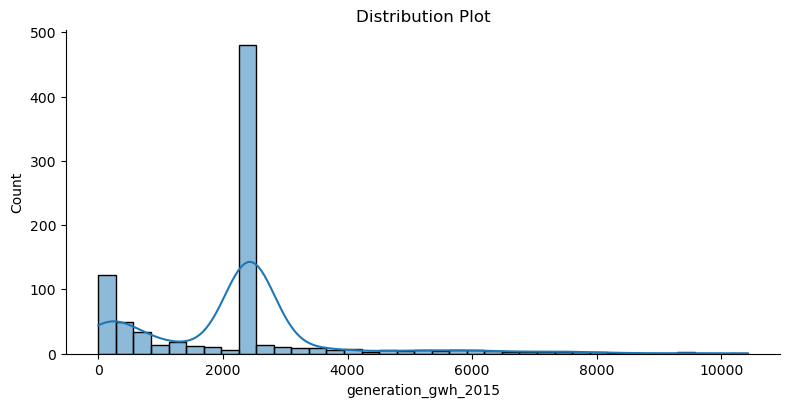

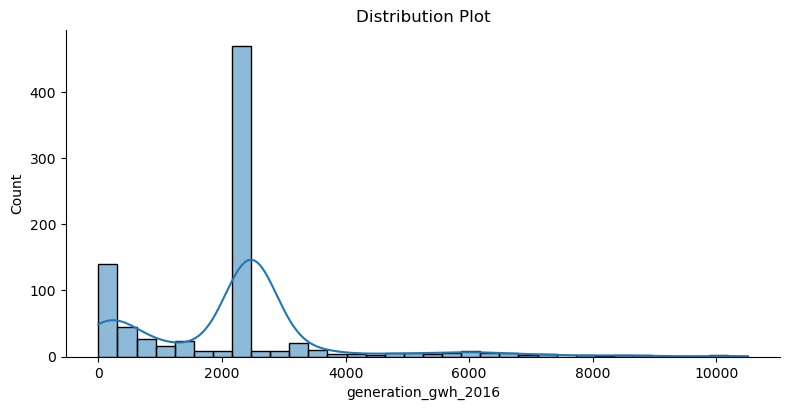

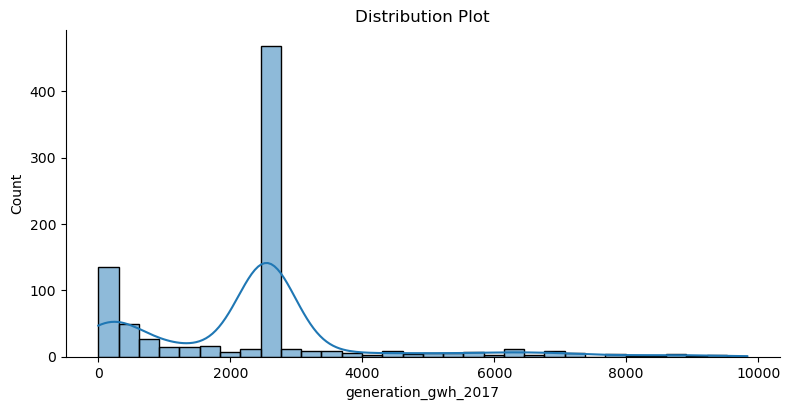

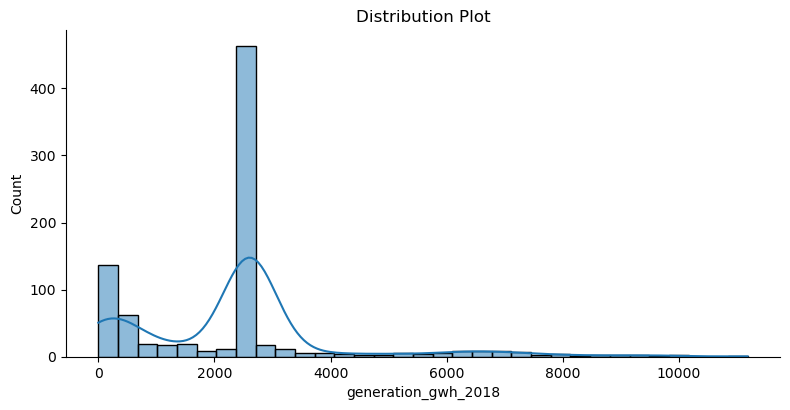

In [44]:
#checking distribution of columns
for i in num_c:
    sb.displot(df[i],kde=True,height=4,aspect=2)
    plt.title('Distribution Plot')    

**'capacity_mw', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'** columns are skewed to the right.  
**'commissioning_year'** column is skewed to the left.

In [45]:
df.skew()

capacity_mw            2.163488
latitude              -0.110936
longitude              0.917381
commissioning_year    -0.836962
generation_gwh_2014    1.525975
generation_gwh_2015    1.375828
generation_gwh_2016    1.389992
generation_gwh_2017    1.293269
generation_gwh_2018    1.421012
dtype: float64

All of the columns are in **unaccpetable range, except** for **'latitude'** feature, thus , we can use **yeojohnson method** to remove skewness. 

In [46]:
skew=list(num_c)#creating new list with same data as 'num_c'
skew.remove('latitude')#removing 'latitude' feature from the list

skew_Data=df.copy()#creating new data frame with same data as 'df'

from scipy.stats import yeojohnson as yj #importing library

for i in skew:#iterating through 'skew' variable
    skew_Data[i],p=yj(skew_Data[i])

skew_Data.skew()

capacity_mw            0.016759
latitude              -0.110936
longitude              0.000000
commissioning_year          NaN
generation_gwh_2014   -0.241358
generation_gwh_2015   -0.309409
generation_gwh_2016   -0.311647
generation_gwh_2017   -0.330764
generation_gwh_2018   -0.328334
dtype: float64

**All values are in accpetable range except** for **'commissioning_year'** feature as it is returning 'NaN', thus we can **try cuberoot method** on it.

In [47]:
skew.remove('commissioning_year')#removing 'commissioning_year' feature from the list

#updating values in original data frame
for i in skew:#iterating through 'skew' variable
    
    df[i],p=yj(df[i])#using yeojohnson method

df.skew()

capacity_mw            0.016759
latitude              -0.110936
longitude              0.000000
commissioning_year    -0.836962
generation_gwh_2014   -0.241358
generation_gwh_2015   -0.309409
generation_gwh_2016   -0.311647
generation_gwh_2017   -0.330764
generation_gwh_2018   -0.328334
dtype: float64

In [48]:
skew_Data=df.copy()#creating new data frame with same data as 'df'

skew_Data['commissioning_year']=np.cbrt(skew_Data['commissioning_year'])#using cuberoot method

skew_Data.skew()

capacity_mw            0.016759
latitude              -0.110936
longitude              0.000000
commissioning_year    -0.853643
generation_gwh_2014   -0.241358
generation_gwh_2015   -0.309409
generation_gwh_2016   -0.311647
generation_gwh_2017   -0.330764
generation_gwh_2018   -0.328334
dtype: float64

Skewness is increased after applying **cuberoot method**,hence , we can try log method

In [49]:
skew_Data['commissioning_year']=np.log(skew_Data['commissioning_year'])#using log method

skew_Data.skew()

capacity_mw            0.016759
latitude              -0.110936
longitude              0.000000
commissioning_year    -0.862000
generation_gwh_2014   -0.241358
generation_gwh_2015   -0.309409
generation_gwh_2016   -0.311647
generation_gwh_2017   -0.330764
generation_gwh_2018   -0.328334
dtype: float64

Skewness is increased after applying **log method**,therefore , we can try square root method

In [50]:
skew_Data['commissioning_year']=np.sqrt(skew_Data['commissioning_year'])#using square root method

skew_Data.skew()

capacity_mw            0.016759
latitude              -0.110936
longitude              0.000000
commissioning_year    -0.863651
generation_gwh_2014   -0.241358
generation_gwh_2015   -0.309409
generation_gwh_2016   -0.311647
generation_gwh_2017   -0.330764
generation_gwh_2018   -0.328334
dtype: float64

**Skewness is increased** after applying **square root method** on **'commissioning_year'** feature, we have applied various applicable methods, thus we can **accpet  this value as a threshold value**.  

In [51]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.231027,28.1839,0.232804,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,139.491675,123.398952,113.484533,112.677240,100.736441
1,4.311552,24.7663,0.232804,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,139.491675,123.398952,113.484533,112.677240,100.736441
2,3.509105,21.9038,0.232804,Wind,Oil,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,139.491675,123.398952,113.484533,112.677240,100.736441
3,4.589482,23.8712,0.232804,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,63.777609,68.895426,65.477700,54.939585,48.360285
4,6.761088,21.9603,0.232804,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,158.191362,200.858110,185.987814,167.378364,170.059042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,6.665521,16.2949,0.232804,Coal,Oil,2016.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,139.491675,0.837201,31.594466,63.362618,50.729495
903,1.359711,12.8932,0.232804,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,139.491675,123.398952,113.484533,112.677240,100.736441
904,3.131161,15.2758,0.232804,Wind,Oil,1997.091082,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,139.491675,123.398952,113.484533,112.677240,100.736441
905,4.134631,24.3500,0.232804,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,139.491675,123.398952,113.484533,112.677240,100.736441


In [52]:
for i in cat_c:#iterating through 'cat_c' list
    
    df[i]=le.fit_transform(df[i])#Transforming columns
    
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.231027,28.1839,0.232804,6,2,2011.000000,228,109,128,1,139.491675,123.398952,113.484533,112.677240,100.736441
1,4.311552,24.7663,0.232804,1,2,1997.091082,257,174,173,2,139.491675,123.398952,113.484533,112.677240,100.736441
2,3.509105,21.9038,0.232804,7,2,1997.091082,2,21,205,2,139.491675,123.398952,113.484533,112.677240,100.736441
3,4.589482,23.8712,0.232804,2,2,2004.000000,5,22,58,2,63.777609,68.895426,65.477700,54.939585,48.360285
4,6.761088,21.9603,0.232804,1,2,2015.000000,5,22,58,2,158.191362,200.858110,185.987814,167.378364,170.059042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,6.665521,16.2949,0.232804,1,2,2016.000000,5,22,58,2,139.491675,0.837201,31.594466,63.362618,50.729495
903,1.359711,12.8932,0.232804,6,2,1997.091082,114,77,22,0,139.491675,123.398952,113.484533,112.677240,100.736441
904,3.131161,15.2758,0.232804,7,2,1997.091082,5,21,260,2,139.491675,123.398952,113.484533,112.677240,100.736441
905,4.134631,24.3500,0.232804,1,2,1997.091082,91,59,82,2,139.491675,123.398952,113.484533,112.677240,100.736441


All the catagorical data have been encoded. 

In [53]:
#Checking correlation between independant and dependant variables
cor=df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.047941,0.338232,-0.528366,-0.041615,0.253572,-0.499912,-0.398307,-0.339549,0.477145,0.010731,-0.007814,0.011955,0.023644,0.016815
latitude,0.047941,1.000000,-0.070743,-0.000167,0.036869,0.102060,-0.061014,0.069183,-0.125727,-0.202429,0.053125,0.040483,0.047084,0.025088,0.031796
longitude,0.338232,-0.070743,1.000000,-0.407084,0.027962,0.137673,-0.299749,-0.242849,-0.323043,0.301478,-0.115823,-0.133053,-0.090635,-0.100084,-0.094489
primary_fuel,-0.528366,-0.000167,-0.407084,1.000000,0.006253,-0.155342,0.273652,0.040273,0.587338,-0.479060,0.037778,0.044716,0.034802,0.038555,0.036621
other_fuel1,-0.041615,0.036869,0.027962,0.006253,1.000000,0.048792,0.036094,0.028321,0.030047,-0.022711,0.040462,0.054036,0.063343,0.030673,0.070769
commissioning_year,0.253572,0.102060,0.137673,-0.155342,0.048792,1.000000,-0.034365,-0.015329,-0.030681,0.023677,0.120965,0.136795,0.178806,0.156095,0.157618
owner,-0.499912,-0.061014,-0.299749,0.273652,0.036094,-0.034365,1.000000,0.765389,0.408294,-0.374835,0.209974,0.226342,0.228138,0.223803,0.230362
source,-0.398307,0.069183,-0.242849,0.040273,0.028321,-0.015329,0.765389,1.000000,0.146603,-0.498367,0.164755,0.177598,0.179007,0.175606,0.180752
url,-0.339549,-0.125727,-0.323043,0.587338,0.030047,-0.030681,0.408294,0.146603,1.000000,-0.005392,0.174797,0.188424,0.189918,0.186310,0.191770
geolocation_source,0.477145,-0.202429,0.301478,-0.479060,-0.022711,0.023677,-0.374835,-0.498367,-0.005392,1.000000,-0.132123,-0.142422,-0.143552,-0.140825,-0.144952


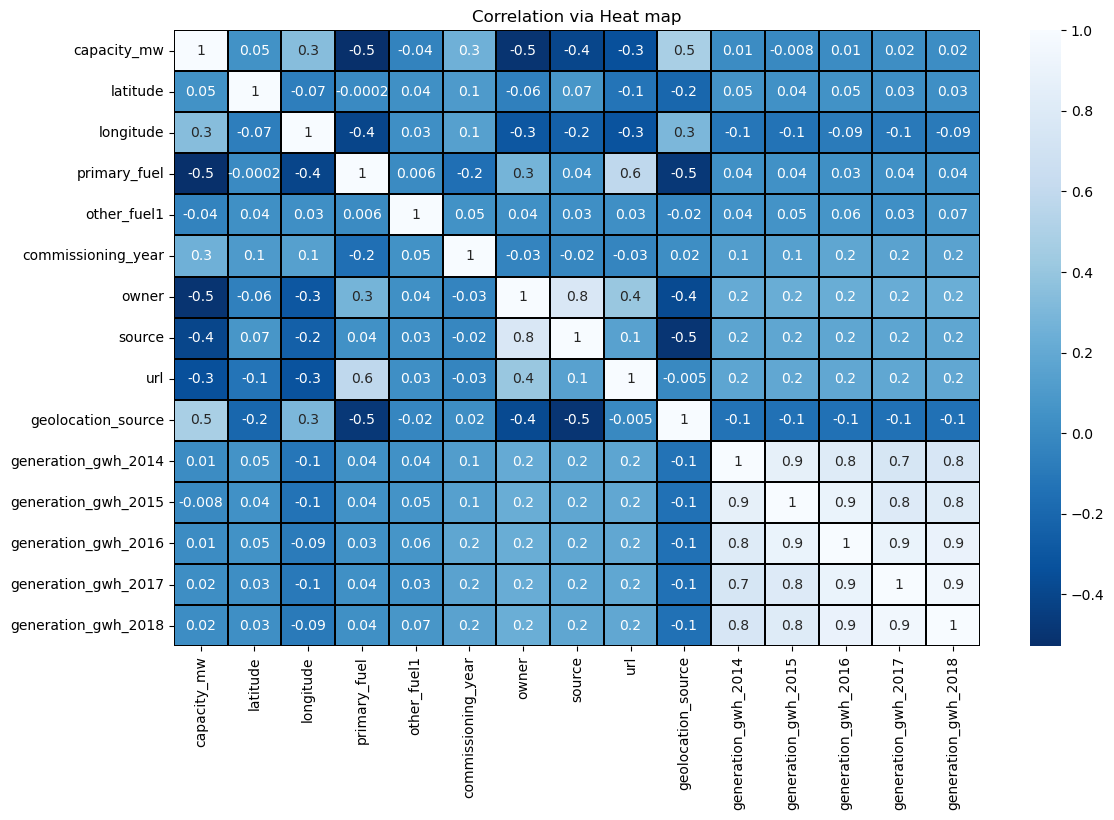

In [54]:
#Visualizing correlation via heat map
plt.figure(figsize=(13,8))
sb.heatmap(cor,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1,fmt='0.1g')
plt.title('Correlation via Heat map')
plt.show()

We can observe the following from this heatmap:  
1)**'generation_gwh_2018', 'generation_gwh_2017', 'generation_gwh_2016', 'generation_gwh_2014', 'commissioning_year', 'longitude'and 'latitude'** features have **low positive correlation** with **target variable.**  
  
2)**'generation_gwh_2015', 'url' and 'other_fuel1'** features have **low negative correlation** with  **target variable.**   
  
3)**'geolocation_source'** feature has **moderate positive correlation** with **target variable.**  
  
4)**'source', 'owner' and 'primary_fuel'** features has **moderate negative correlation** with **target variable.** 

5)These are the following **pairs with high positive correlation with each other:**  
  
**'generation_gwh_2014' and 'generation_gwh_2018'** features   
**'generation_gwh_2014' and 'generation_gwh_2016'** features  
**'generation_gwh_2014' and 'generation_gwh_2015'** features   
**'generation_gwh_2015' and 'generation_gwh_2018'** features  
**'generation_gwh_2015' and 'generation_gwh_2017'** features   
**'generation_gwh_2015' and 'generation_gwh_2016'** features  
**'generation_gwh_2016' and 'generation_gwh_2018'** features   
**'generation_gwh_2016' and 'generation_gwh_2017'** features     
**'generation_gwh_2017' and 'generation_gwh_2018'** features  

In [55]:
#Separating features and target variable 
x=df.drop('capacity_mw',axis=1)
y=df['capacity_mw']

In [56]:
#checking dimensions of features and label 
print('Dimensions of features:',x.shape,'\nDimensions of label:',y.shape)

Dimensions of features: (855, 14) 
Dimensions of label: (855,)


We can observe that both features and lable have **same number of rows**.  
**'x'** contains **14 features**.

In [57]:
#Importing required library to apply StandardScaler
from sklearn.preprocessing import StandardScaler as sc

sc=sc()#creating instance

x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)#transforming data
x

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.162456,-0.932921,1.179853,0.055934,1.162224,2.023138,1.402768,0.436981,-1.040462,0.325398,0.350764,0.353547,0.346830,0.356994
1,0.601181,-0.513810,-0.972887,0.055934,-0.081653,2.370152,2.829096,1.063228,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994
2,0.131070,-2.368066,1.610401,0.055934,-0.081653,-0.681181,-0.528261,1.508559,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994
3,0.454177,2.447853,-0.542339,0.055934,0.536213,-0.645283,-0.506318,-0.537181,0.406034,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,0.140349,1.253377,-0.972887,0.055934,1.519944,-0.645283,-0.506318,-0.537181,0.406034,0.665459,1.898972,1.923558,1.534388,2.046635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,-0.790085,0.216288,-0.972887,0.055934,1.609374,-0.645283,-0.506318,-0.537181,0.406034,0.325398,-2.098927,-1.419729,-0.723788,-0.861856
851,-1.348749,0.406355,1.179853,0.055934,-0.081653,0.659012,0.700575,-1.038178,-2.486957,0.325398,0.350764,0.353547,0.346830,0.356994
852,-0.957453,-0.239580,1.610401,0.055934,-0.081653,-0.645283,-0.528261,2.273972,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994
853,0.532811,-0.772877,-0.972887,0.055934,-0.081653,0.383794,0.305592,-0.203182,0.406034,0.325398,0.350764,0.353547,0.346830,0.356994


The data is scaled using StandarScaler method to overcome the **issue of biasness.**

In [58]:
#Checking varience inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Importing required library

v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.106966,latitude
1,1.330786,longitude
2,3.638891,primary_fuel
3,1.026329,other_fuel1
4,1.106026,commissioning_year
5,3.295082,owner
6,3.892801,source
7,2.645837,url
8,3.012267,geolocation_source
9,4.137245,generation_gwh_2014


**'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'** features have **high VIF value**, thus posing **multicollinearity problem**. We can **drop 'generation_gwh_2017'** feature as it has the **highest VIF value.** 

In [59]:
x.drop('generation_gwh_2017',axis=1,inplace=True)#Dropping 'generation_gwh_2017' feature
x

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2018
0,1.162456,-0.932921,1.179853,0.055934,1.162224,2.023138,1.402768,0.436981,-1.040462,0.325398,0.350764,0.353547,0.356994
1,0.601181,-0.513810,-0.972887,0.055934,-0.081653,2.370152,2.829096,1.063228,0.406034,0.325398,0.350764,0.353547,0.356994
2,0.131070,-2.368066,1.610401,0.055934,-0.081653,-0.681181,-0.528261,1.508559,0.406034,0.325398,0.350764,0.353547,0.356994
3,0.454177,2.447853,-0.542339,0.055934,0.536213,-0.645283,-0.506318,-0.537181,0.406034,-1.051490,-0.738620,-0.686010,-0.919602
4,0.140349,1.253377,-0.972887,0.055934,1.519944,-0.645283,-0.506318,-0.537181,0.406034,0.665459,1.898972,1.923558,2.046635
...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,-0.790085,0.216288,-0.972887,0.055934,1.609374,-0.645283,-0.506318,-0.537181,0.406034,0.325398,-2.098927,-1.419729,-0.861856
851,-1.348749,0.406355,1.179853,0.055934,-0.081653,0.659012,0.700575,-1.038178,-2.486957,0.325398,0.350764,0.353547,0.356994
852,-0.957453,-0.239580,1.610401,0.055934,-0.081653,-0.645283,-0.528261,2.273972,0.406034,0.325398,0.350764,0.353547,0.356994
853,0.532811,-0.772877,-0.972887,0.055934,-0.081653,0.383794,0.305592,-0.203182,0.406034,0.325398,0.350764,0.353547,0.356994


**'generation_gwh_2017'** feature is **dropped successfully.**

In [60]:
#re-checking varience inflation factor 
v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.105762,latitude
1,1.329128,longitude
2,3.638351,primary_fuel
3,1.011293,other_fuel1
4,1.106020,commissioning_year
5,3.294922,owner
6,3.892516,source
7,2.645227,url
8,3.011974,geolocation_source
9,4.135375,generation_gwh_2014


**'generation_gwh_2015', 'generation_gwh_2016', and 'generation_gwh_2018'** features still have **high VIF value**. We can **drop 'generation_gwh_2016'** feature as it has the **highest VIF value.** 

In [61]:
x.drop('generation_gwh_2016',axis=1,inplace=True)#Dropping 'generation_gwh_2016' feature
x

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2018
0,1.162456,-0.932921,1.179853,0.055934,1.162224,2.023138,1.402768,0.436981,-1.040462,0.325398,0.350764,0.356994
1,0.601181,-0.513810,-0.972887,0.055934,-0.081653,2.370152,2.829096,1.063228,0.406034,0.325398,0.350764,0.356994
2,0.131070,-2.368066,1.610401,0.055934,-0.081653,-0.681181,-0.528261,1.508559,0.406034,0.325398,0.350764,0.356994
3,0.454177,2.447853,-0.542339,0.055934,0.536213,-0.645283,-0.506318,-0.537181,0.406034,-1.051490,-0.738620,-0.919602
4,0.140349,1.253377,-0.972887,0.055934,1.519944,-0.645283,-0.506318,-0.537181,0.406034,0.665459,1.898972,2.046635
...,...,...,...,...,...,...,...,...,...,...,...,...
850,-0.790085,0.216288,-0.972887,0.055934,1.609374,-0.645283,-0.506318,-0.537181,0.406034,0.325398,-2.098927,-0.861856
851,-1.348749,0.406355,1.179853,0.055934,-0.081653,0.659012,0.700575,-1.038178,-2.486957,0.325398,0.350764,0.356994
852,-0.957453,-0.239580,1.610401,0.055934,-0.081653,-0.645283,-0.528261,2.273972,0.406034,0.325398,0.350764,0.356994
853,0.532811,-0.772877,-0.972887,0.055934,-0.081653,0.383794,0.305592,-0.203182,0.406034,0.325398,0.350764,0.356994


**'generation_gwh_2016'** feature is **dropped successfully.**

In [62]:
#re-checking varience inflation factor 
v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.104697,latitude
1,1.322742,longitude
2,3.638205,primary_fuel
3,1.011278,other_fuel1
4,1.097657,commissioning_year
5,3.294364,owner
6,3.892368,source
7,2.643757,url
8,3.011225,geolocation_source
9,4.135139,generation_gwh_2014


**'generation_gwh_2015'** feature still have **high VIF value**. We can **drop 'generation_gwh_2015'** feature as it has the **highest VIF value.** 

In [63]:
x.drop('generation_gwh_2015',axis=1,inplace=True)#Dropping 'generation_gwh_2015' feature
x

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2018
0,1.162456,-0.932921,1.179853,0.055934,1.162224,2.023138,1.402768,0.436981,-1.040462,0.325398,0.356994
1,0.601181,-0.513810,-0.972887,0.055934,-0.081653,2.370152,2.829096,1.063228,0.406034,0.325398,0.356994
2,0.131070,-2.368066,1.610401,0.055934,-0.081653,-0.681181,-0.528261,1.508559,0.406034,0.325398,0.356994
3,0.454177,2.447853,-0.542339,0.055934,0.536213,-0.645283,-0.506318,-0.537181,0.406034,-1.051490,-0.919602
4,0.140349,1.253377,-0.972887,0.055934,1.519944,-0.645283,-0.506318,-0.537181,0.406034,0.665459,2.046635
...,...,...,...,...,...,...,...,...,...,...,...
850,-0.790085,0.216288,-0.972887,0.055934,1.609374,-0.645283,-0.506318,-0.537181,0.406034,0.325398,-0.861856
851,-1.348749,0.406355,1.179853,0.055934,-0.081653,0.659012,0.700575,-1.038178,-2.486957,0.325398,0.356994
852,-0.957453,-0.239580,1.610401,0.055934,-0.081653,-0.645283,-0.528261,2.273972,0.406034,0.325398,0.356994
853,0.532811,-0.772877,-0.972887,0.055934,-0.081653,0.383794,0.305592,-0.203182,0.406034,0.325398,0.356994


**'generation_gwh_2015'** feature is **dropped successfully.**

In [64]:
#re-checking varience inflation factor 
v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.104545,latitude
1,1.317810,longitude
2,3.636186,primary_fuel
3,1.011159,other_fuel1
4,1.096866,commissioning_year
5,3.293619,owner
6,3.892024,source
7,2.642594,url
8,3.010178,geolocation_source
9,2.331001,generation_gwh_2014


Now the multicollinearity problem is solved.

In [65]:
x.shape#checking shape of x

(855, 11)

Now **'x'** has **11 features**.

In [66]:
#Importing libraries required for model building
from sklearn.model_selection import train_test_split as tts, cross_val_score as cvs
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae
from sklearn.svm import SVR as SupportVectorRegression

In [67]:
#Finding best random state on Linear Regression model
r2s_updater=0#initilizing variable
rs_updater=0#initilizing variable

for i in range(1,1000): #running 'if' loop for 999 times
    
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)#spliting data
    
    lr=LinearRegression()#creating instance
    
    lr.fit(x_train,y_train)#fitting  data
    pr=lr.predict(x_test)#predicting data
    r2s=r2_score(y_test,pr)#calculating r2 score 
    
    if r2s>r2s_updater: #using if condition to update 'r2s_updater' and 'rs_updater' only if 'r2s' is greater than 'r2s_updater'
        #updating values
        r2s_updater=r2s
        rs_updater=i

print('Max r2 score during the iteration is ',r2s_updater,'on random state : ',rs_updater)#printing

Max r2 score during the iteration is  0.5951938871880372 on random state :  754


In [68]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=rs_updater)#Spliting data on the best random state

In [69]:
#Creating instance of  various models
LR=LinearRegression() 
L=Lasso()
R=Ridge()
EN=ElasticNet()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ETR=ExtraTreesRegressor()
DTR=DecisionTreeRegressor()
KNR=KNeighborsRegressor()
SVR=SupportVectorRegression()
    
models=[LR,L,R,EN,RFR,GBR,ETR,DTR,KNR,SVR]#Creating list containing the instances of the models

log=float('inf')#Initializing 'log' variable  to positive infinity    

for i in models:#Iterating models 
    
    i.fit(x_train,y_train)#fitting data
    pr=i.predict(x_test)#predicting data
    
    R2score=r2_score(y_test,pr)#calculating r2 score
    MAE=mae(y_test,pr)#calculating Mean Absolute Error
    MSE=mse(y_test,pr)#calculating Mean Squared Error
    RMSE=np.sqrt(MSE)#calculating Root Mean Squared Error
    
    score=cvs(i,x,y)#calculating Cross Validation Score
    diff=abs(R2score - score.mean())*100 #calculating difference of R2score and Cross Validation Score
    
    
    
    #Printing    
    print('\n','R2 score of',str(i).split('(')[0],'is',R2score,'\n','Mean absolute Error of',str(i).split('(')[0],'is',MAE,'\n','Mean squared error of',str(i).split('(')[0],'is',MSE,'\n','Root Mean squared error of',str(i).split('(')[0],'is',RMSE)
    print('\n\nCross validation Score of',str(i).split('(')[0],'is',score,'\nMean: ',score.mean(),'\nDifference between R2 score and cross validation is ',diff)
    
    if diff<log and score.mean()>=0:#Using two condition to execute the following codes i.e. when 'log' is greater than 'diff' and mean of 'score' in not negative
        
        log=diff#Updating 'log' variable if condition is 'True'
        b_d=diff#Storing difference in 'b_d' variable in context to  the corresponding iteration 
        
        model=str(i).split('(')[0]#Storing model name in 'model' variable in context to  the corresponding iteration

print(f'\n\n{model} is the best model with least difference between R2 score and cross validation i.e {b_d}')#Printing         


 R2 score of LinearRegression is 0.5951938871880372 
 Mean absolute Error of LinearRegression is 0.8769036605242849 
 Mean squared error of LinearRegression is 1.0996846478213826 
 Root Mean squared error of LinearRegression is 1.048658499141347


Cross validation Score of LinearRegression is [0.47543695 0.52399559 0.46244337 0.4521859  0.49222924] 
Mean:  0.4812582109039661 
Difference between R2 score and cross validation is  11.393567628407114

 R2 score of Lasso is -0.0018923093925684586 
 Mean absolute Error of Lasso is 1.4154468434981173 
 Mean squared error of Lasso is 2.7217118431240235 
 Root Mean squared error of Lasso is 1.6497611472949723


Cross validation Score of Lasso is [-5.30577708e-04 -3.10939723e-06 -7.70812083e-05 -1.54956625e-02
 -7.11114383e-03] 
Mean:  -0.0046435149322222365 
Difference between R2 score and cross validation is  0.27512055396537777

 R2 score of Ridge is 0.5952778059600664 
 Mean absolute Error of Ridge is 0.8769127002579101 
 Mean squared error

Here by comparing difference of R2 score and cross validation  of various models, **ElasticNet** has the least difference between R2 score and cross validation than the rest of the models, however it's not performing well as per observations made via metrics.  
We are **selecting** 2nd best model **DecisionTreeRegressor**.

In [70]:
#Using GridSearchCV  for hyperparameter tuning
from sklearn.model_selection import GridSearchCV as GSC#Importing required library

pa={'criterion':['squared_error','absolute_error','friedman_mse','poisson'],'splitter':['best','random'],'max_depth':[None,10,20,30],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}#defining hyper parameters

gsc=GSC(DTR,pa)#creating instance

gsc.fit(x_train,y_train)#fitting data
gsc.best_params_#fetching best parameters

{'criterion': 'absolute_error',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'best'}

In [71]:
#Applying best parameters provided by GridSearchCV
final=DecisionTreeRegressor(criterion='absolute_error',splitter='best',max_depth=10,min_samples_split=10,min_samples_leaf=2)

In [72]:
final.fit(x_train,y_train)#fitting data
pr=final.predict(x_test)#predicting data

print('R2 score :',r2_score(y_test,pr))#printing 
print('Mean Absolute Error:',mae(y_test,pr))#printing
print('Mean Squared Error :',mse(y_test,pr))#printing
print('Root Mean Squared Error:',np.sqrt(MSE))#printing

R2 score : 0.7752904493389654
Mean Absolute Error: 0.5651912963563082
Mean Squared Error : 0.6104395048885201
Root Mean Squared Error: 0.8900355439252637


Model's r2 score is **increased** from **63% to 77%** and there is decrease in errors.

In [73]:
#Conclusion
Predicted_values=final.predict(x_test)#storing predicted values in 'Predicted_values' variable
Original_values=y_test#storing original values in 'Original_values' variable

conclusion=pd.DataFrame({'Predicted Values':Predicted_values,'Original Values':Original_values})#creating new data frame with Predicted and Original values
conclusion.sample(20)

,Predicted Values,Original Values
402,2.776408,2.918258
823,2.319101,2.262103
556,0.686458,1.747518
237,5.581608,6.063036
872,3.141429,3.735157
287,3.882915,3.434227
576,2.525605,3.273927
259,5.790498,5.408237
595,5.878058,5.354964
136,4.851653,5.051406


Here we can conclude that the model **predicted values** are **fairly close enough** to the **original values.** 

In [74]:
#Saving the model
import joblib#importing library
joblib.dump(final,r'D:\Models\GBPD_R.obj')#saving model into desired path

['D:\\Models\\GBPD_R.obj']

Now we are going to treat **'primary_fuel' as target variable.**

In [75]:
#importing R-GPP_Database data set 
df=pd.read_csv(r'D:\Files\R-GPP_Database.csv')
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,Oil,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,Wind,Oil,1997.091082,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


Data frame has **907 rows and 15 columns** out of which 14 columns are inputs and 1 column is **target variable i.e 'primary_fuel' column**.  
As the target variable has **catagorical data**,thus it represents **Classification problem.**  
The goal is to **predict primary fuel**.


From the previous analysis, we observed  **statistical information** of the **numerical columns**, **no duplicate values** were found, **presence of null values** and the data frame which we imported is  already free of NaN values, and we conducted **various graphical analyses** of each columns.

In [76]:
#checking unique values, Number of unique values and value_counts of target variable
print('\nprimary_fuel',':-\nUnique values:',df['primary_fuel'].unique(),'\nNumber of unique values:',df['primary_fuel'].nunique(),'\n\n',df['primary_fuel'].value_counts().to_frame('Value Counts'))#Printing


primary_fuel :-
Unique values: ['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear'] 
Number of unique values: 8 

          Value Counts
Coal              258
Hydro             251
Solar             127
Wind              123
Gas                69
Biomass            50
Oil                20
Nuclear             9


We can conclude that this data is imbalanced , we can use Sampling methods to overcome it.

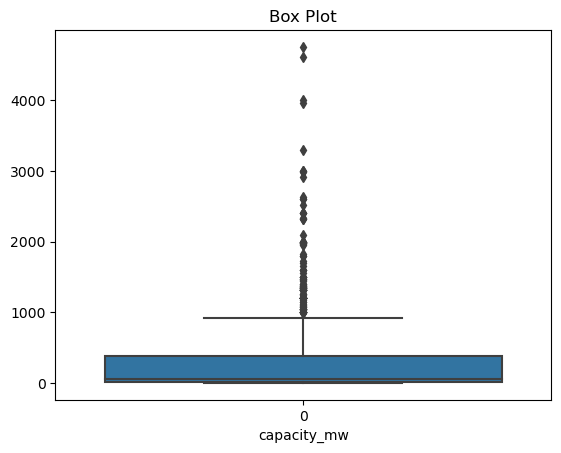

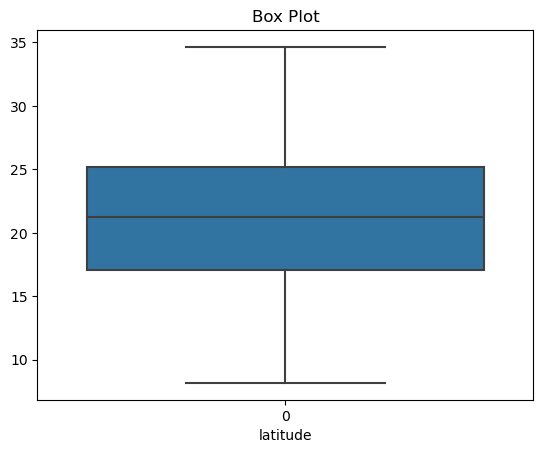

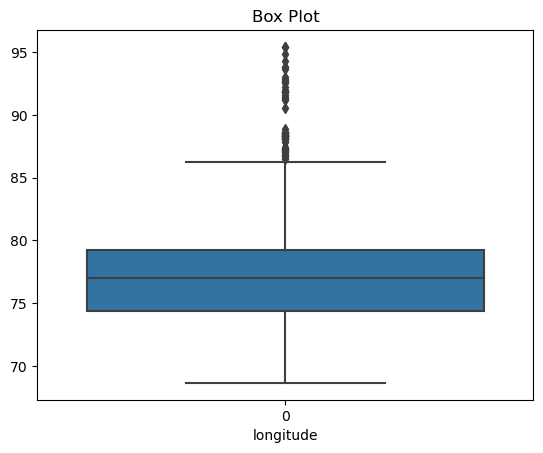

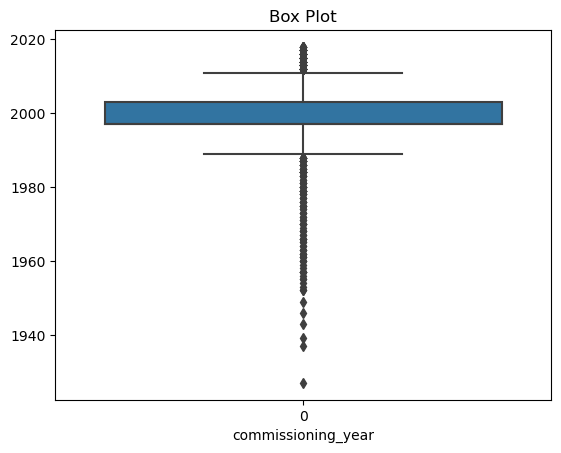

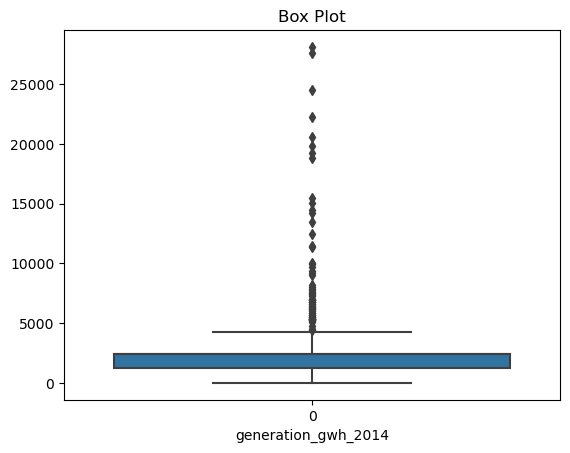

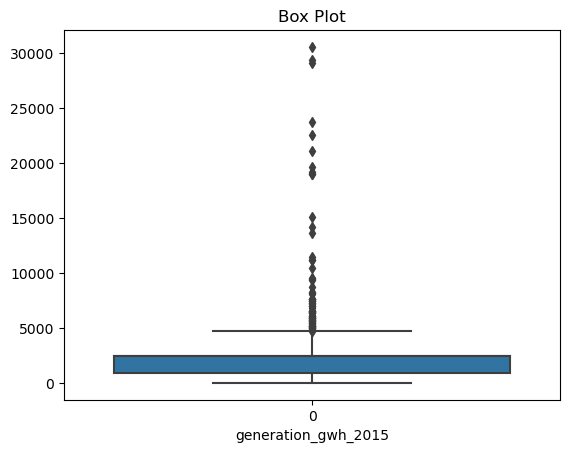

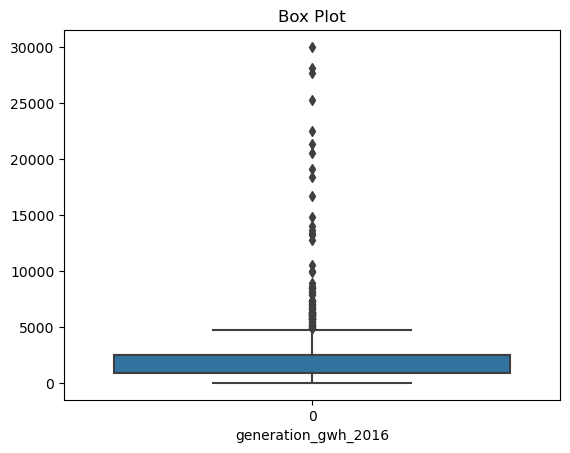

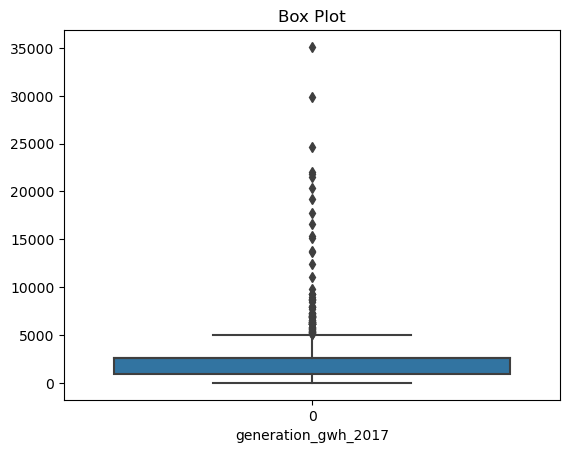

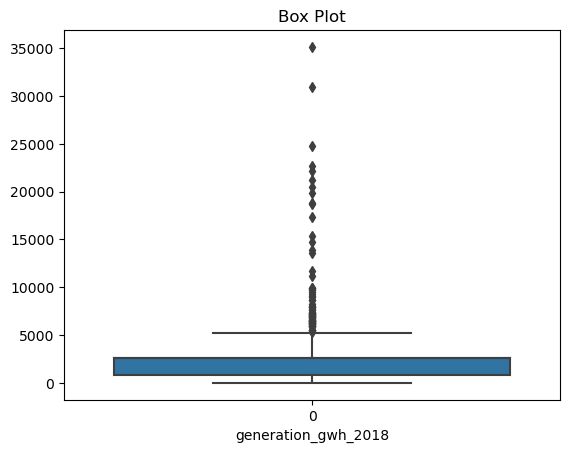

In [77]:
col=df.columns.to_list()#storing columns of data frame in 'col' variable

#Checking outliers via Box Plot

#creating empty list
num_c=[]
cat_c=[]

for i in col:#iterating through 'col' variable 
    
    if df[i].dtypes=='float64':#using if condition to execute the following code only if the columns contains numeric values
        num_c.append(i)#appending 'i' in 'num_c' list

    elif df[i].dtypes=='object':#using if condition to execute the following code only if the columns contains catagorical values
        cat_c.append(i)#appending 'i' in 'cat_c' list


for i in num_c:
    sb.boxplot(df[i])
    plt.xlabel(i)
    plt.title('Box Plot')
    plt.show()

All of these features contains outliers except for **'latitude'** feature.

In [78]:
#removing outliers using zscore method
#Importing necessary libraries

out=list(num_c)#creating new list with same data as 'num_c'
out.remove('latitude')#removing 'latitude' from the list

f_outlier=df[out]
z=np.abs(zs(f_outlier))
z

,capacity_mw,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,0.878280,1.069162,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
1,0.386977,0.593788,0.000000,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
2,0.486679,1.682394,0.000000,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
3,0.324240,2.889052,0.531080,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,2.498942,1.027976,1.376637,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00
...,...,...,...,...,...,...,...,...
902,2.159821,0.022477,1.453505,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01
903,0.548060,0.145644,0.000000,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
904,0.509909,0.391673,0.000000,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16
905,0.417498,0.772866,0.000000,1.707094e-16,0.000000,0.000000,3.114824e-16,1.501244e-16


The **variable 'z'** holds the **zscores values** of these features.

In [79]:
#checking outliers as per the threshold value as '3'
np.where(z>3)

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
        179, 183, 209, 209, 209, 209, 209, 209, 222, 244, 308, 308, 308,
        308, 308, 308, 323, 333, 340, 342, 360, 363, 364, 364, 364, 364,
        364, 364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493, 493,
        493, 493, 493, 493, 494, 494, 494, 494, 494, 494, 499, 519, 538,
        541, 546, 573, 577, 583, 592, 601, 621, 638, 648, 648, 648, 648,
        648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695, 695,
        695, 706, 709, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
        726, 726, 726, 726, 726, 728, 767, 786, 786, 786, 786, 786, 786,
        788, 807, 808, 808, 808, 808, 808, 808, 818, 847, 848, 880, 880,
        880, 880, 880, 880], dtype=int64),
 array([0, 4, 5, 6, 7, 0, 3, 4, 5, 6, 7, 0, 3, 1, 1, 0, 3, 4, 5, 6, 7, 2,
        1, 0, 3, 4, 5, 6, 7, 1, 1, 1, 2, 1, 0, 0, 3, 4, 5, 6, 7, 2, 0, 1,
        1, 2, 2, 2, 0, 2, 0, 3, 4, 5, 6, 7, 0, 3, 4, 5, 6, 7, 1, 1, 2, 2,
     

In [80]:
#checking value of the outliers
z.iloc[15,0]

3.906294028602196

In [81]:
z.iloc[15,4]

3.0523223040496053

In [82]:
z.iloc[15,5]

3.740709931709165

In [83]:
z.iloc[15,6]

4.379312802119109

We can confirm that these values holds outlier as per the threshold value.

In [84]:
#Removing outliers 
zscore=df[(z<3).all(axis=1)]#storing values in 'zscore' variable

In [85]:
#Using IQR method to remove outliers from the original data frame
q1=f_outlier.quantile(.25)
q3=f_outlier.quantile(.75)
iqr=q3-q1
IQR=df[~((df< (q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]

In [86]:
print('Data loss percentage after removing outliers via zscore method',((df.shape[0]-zscore.shape[0])/df.shape[0])*100)
print('Data loss percentage after removing outliers via IQR method',((df.shape[0]-IQR.shape[0])/df.shape[0])*100)

Data loss percentage after removing outliers via zscore method 6.39470782800441
Data loss percentage after removing outliers via IQR method 38.699007717750824


We can observe that **zscore method performed well** than IQR method, hence, we will **update** the data frame with **zscore method.**

In [87]:
outliers=df.shape[0]-zscore.shape[0]#storing number of outliers removed in 'outliers' variable

print(f'Outliers removed : {outliers}')#printing
df=zscore#Updating data frame

Outliers removed : 58


In [88]:
df.shape#checking shape of data frame

(849, 15)

Now the data frame has **849 rows.**

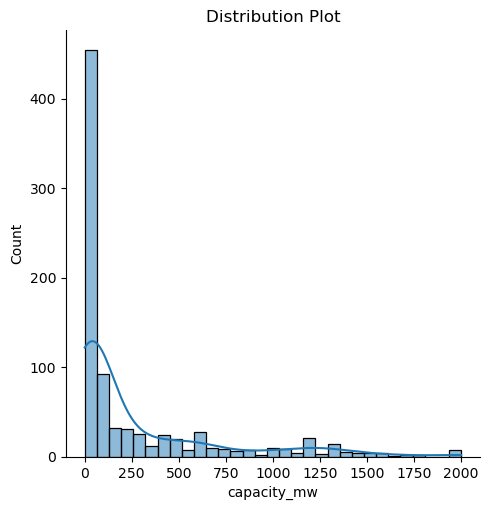

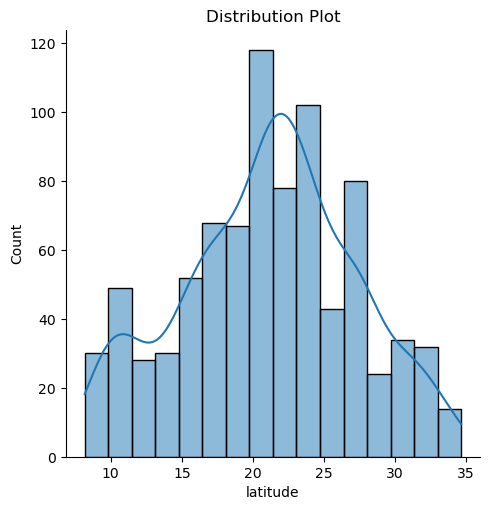

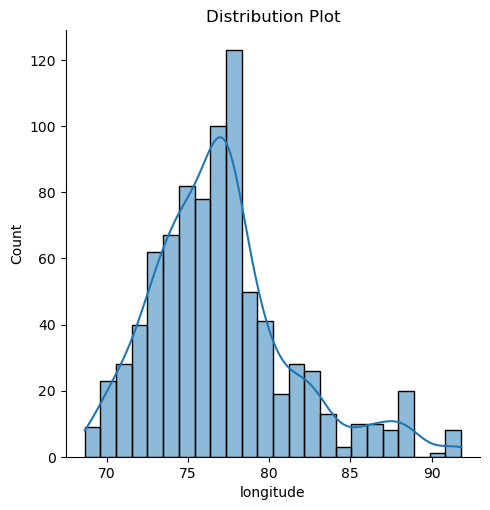

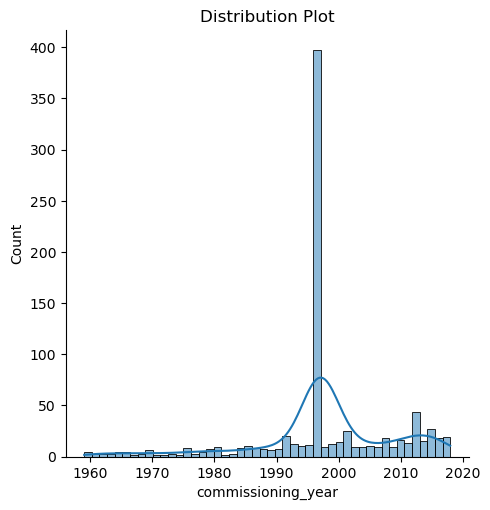

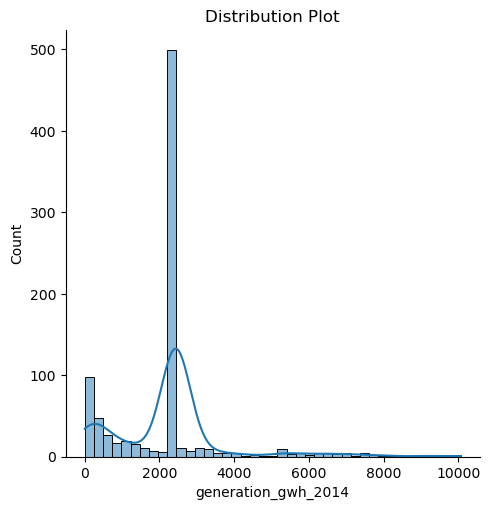

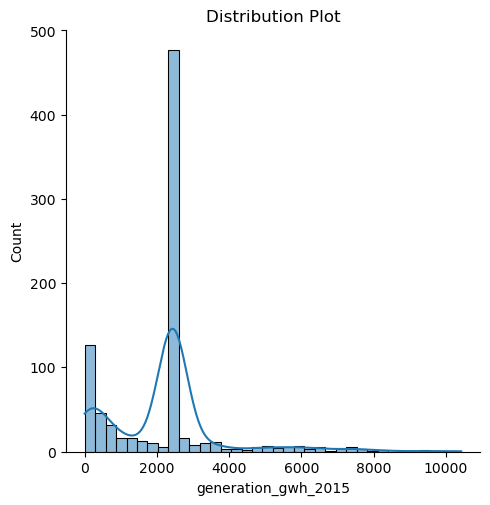

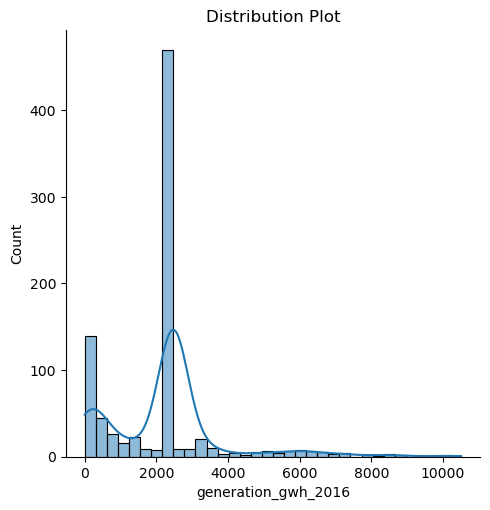

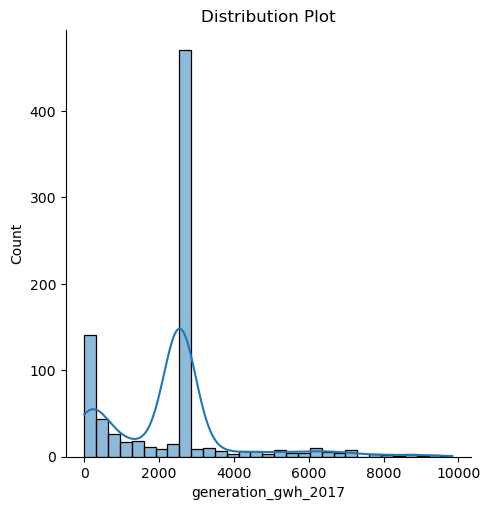

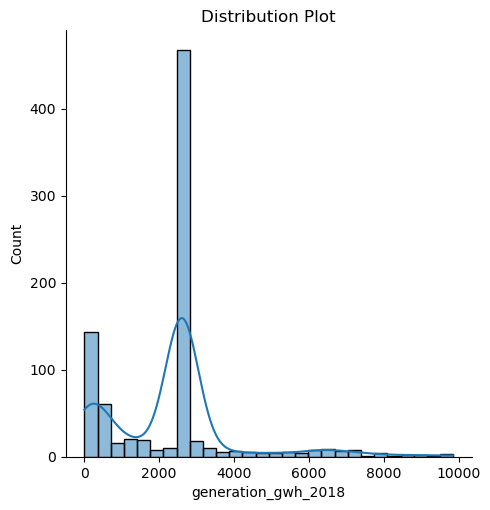

In [89]:
#checking distribution of columns
for i in num_c:
    sb.displot(df[i],kde=True)
    plt.title('Distribution Plot')    

**'capacity_mw', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'** columns are **skewed to the right**.  
**'commissioning_year'** column is **skewed to the left**. 

In [90]:
df.skew()#checking skewness

capacity_mw            1.979914
latitude              -0.109823
longitude              0.921980
commissioning_year    -0.845654
generation_gwh_2014    1.526648
generation_gwh_2015    1.389889
generation_gwh_2016    1.413144
generation_gwh_2017    1.278735
generation_gwh_2018    1.315481
dtype: float64

All of the columns are in **unaccpetable range, except** for **'latitude'** feature, thus , we can use **yeojohnson method** to remove skewness. 

In [91]:
skew=list(num_c)#creating new list with same data as 'n_col'

skew.remove('latitude')#removing 'latitude' feature from the list
skew.remove('commissioning_year')#removing 'commissioning_year' feature from the list

from scipy.stats import yeojohnson as yj #importing library

for i in skew:#iterating through 'skew' variable
    df[i],p=yj(df[i])

df.skew()

capacity_mw            0.015527
latitude              -0.109823
longitude              0.000000
commissioning_year    -0.845654
generation_gwh_2014   -0.243975
generation_gwh_2015   -0.309166
generation_gwh_2016   -0.309194
generation_gwh_2017   -0.340677
generation_gwh_2018   -0.354764
dtype: float64

All of the selected column's skewness is reduced.

In [92]:
skew_Data=df.copy()#creating new data frame with same data as 'df'

skew_Data['commissioning_year']=np.cbrt(skew_Data['commissioning_year'])#applying  cuberoot method

skew_Data.skew()

capacity_mw            0.015527
latitude              -0.109823
longitude              0.000000
commissioning_year    -0.862408
generation_gwh_2014   -0.243975
generation_gwh_2015   -0.309166
generation_gwh_2016   -0.309194
generation_gwh_2017   -0.340677
generation_gwh_2018   -0.354764
dtype: float64

Skewness is increased after applying **cuberoot method**,hence , we can try log method

In [93]:
skew_Data['commissioning_year']=np.log(skew_Data['commissioning_year'])#using log method

skew_Data.skew()

capacity_mw            0.015527
latitude              -0.109823
longitude              0.000000
commissioning_year    -0.870800
generation_gwh_2014   -0.243975
generation_gwh_2015   -0.309166
generation_gwh_2016   -0.309194
generation_gwh_2017   -0.340677
generation_gwh_2018   -0.354764
dtype: float64

Skewness is increased after applying **log method**,therefore , we can try square root method

In [94]:
skew_Data['commissioning_year']=np.sqrt(skew_Data['commissioning_year'])#using square root method

skew_Data.skew()

capacity_mw            0.015527
latitude              -0.109823
longitude              0.000000
commissioning_year    -0.872458
generation_gwh_2014   -0.243975
generation_gwh_2015   -0.309166
generation_gwh_2016   -0.309194
generation_gwh_2017   -0.340677
generation_gwh_2018   -0.354764
dtype: float64

**Skewness is increased** after applying **square root method** on **'commissioning_year'** feature, we have applied various applicable methods, thus we can **accpet  this value as a threshold value**.  

In [95]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.232447,28.1839,0.231159,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,137.967319,121.666917,113.657459,116.201050,108.648505
1,4.329543,24.7663,0.231159,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,137.967319,121.666917,113.657459,116.201050,108.648505
2,3.520920,21.9038,0.231159,Wind,Oil,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,137.967319,121.666917,113.657459,116.201050,108.648505
3,4.609929,23.8712,0.231159,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,63.226981,68.085744,65.561648,56.298850,51.306639
4,6.806555,21.9603,0.231159,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,156.402932,197.645117,186.312842,173.239485,185.677922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,6.709663,16.2949,0.231159,Coal,Oil,2016.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,137.967319,0.836485,31.625415,65.010430,53.876239
903,1.361445,12.8932,0.231159,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,137.967319,121.666917,113.657459,116.201050,108.648505
904,3.140531,15.2758,0.231159,Wind,Oil,1997.091082,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,137.967319,121.666917,113.657459,116.201050,108.648505
905,4.151145,24.3500,0.231159,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,137.967319,121.666917,113.657459,116.201050,108.648505


In [105]:
enc=list(cat_c)#creating new list with same data of 'cat_c' containing names of catagotical columns of data frame

enc.remove('primary_fuel')#removing target variable from the list

for i in enc:#iterating through 'enc' list
    
    df[i]=le.fit_transform(df[i])#transforming data

enc_pf=pd.DataFrame()#creating empty data frame

enc_pf['primary_fuel']=df['primary_fuel']#copying contents of target variable

df['primary_fuel']=le.fit_transform(df['primary_fuel'])#transforming data

enc_pf['encoded_primary_fuel']=df['primary_fuel']#copying contents of encoded target variable

df

All the catagorical data have been encoded. 

In [109]:
#Checking correlation between independant and dependant variables
cor=df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.048305,0.337035,-0.523672,-0.042842,0.239617,-0.498275,-0.396832,-0.337128,0.477422,0.007156,-0.017282,0.004249,0.003924,-0.008845
latitude,0.048305,1.000000,-0.071740,0.000041,0.036878,0.102747,-0.061001,0.069393,-0.125811,-0.202748,0.052737,0.039807,0.044077,0.023759,0.030694
longitude,0.337035,-0.071740,1.000000,-0.406153,0.027815,0.134598,-0.298603,-0.241851,-0.322273,0.301031,-0.117067,-0.136395,-0.096172,-0.107722,-0.102197
primary_fuel,-0.523672,0.000041,-0.406153,1.000000,0.006660,-0.147009,0.270518,0.036949,0.586205,-0.478148,0.040284,0.050236,0.039697,0.049929,0.051170
other_fuel1,-0.042842,0.036878,0.027815,0.006660,1.000000,0.048590,0.036403,0.028547,0.030290,-0.022885,0.040407,0.053978,0.063522,0.030334,0.070756
commissioning_year,0.239617,0.102747,0.134598,-0.147009,0.048590,1.000000,-0.028028,-0.010244,-0.025412,0.019690,0.118777,0.130642,0.175842,0.143364,0.139983
owner,-0.498275,-0.061001,-0.298603,0.270518,0.036403,-0.028028,1.000000,0.764899,0.406857,-0.373751,0.212194,0.230931,0.233075,0.233521,0.243279
source,-0.396832,0.069393,-0.241851,0.036949,0.028547,-0.010244,0.764899,1.000000,0.144960,-0.497655,0.166402,0.181096,0.182778,0.183127,0.190779
url,-0.337128,-0.125811,-0.322273,0.586205,0.030290,-0.025412,0.406857,0.144960,1.000000,-0.003856,0.176566,0.192157,0.193941,0.194312,0.202431
geolocation_source,0.477422,-0.202748,0.301031,-0.478148,-0.022885,0.019690,-0.373751,-0.497655,-0.003856,1.000000,-0.133401,-0.145180,-0.146528,-0.146809,-0.152943


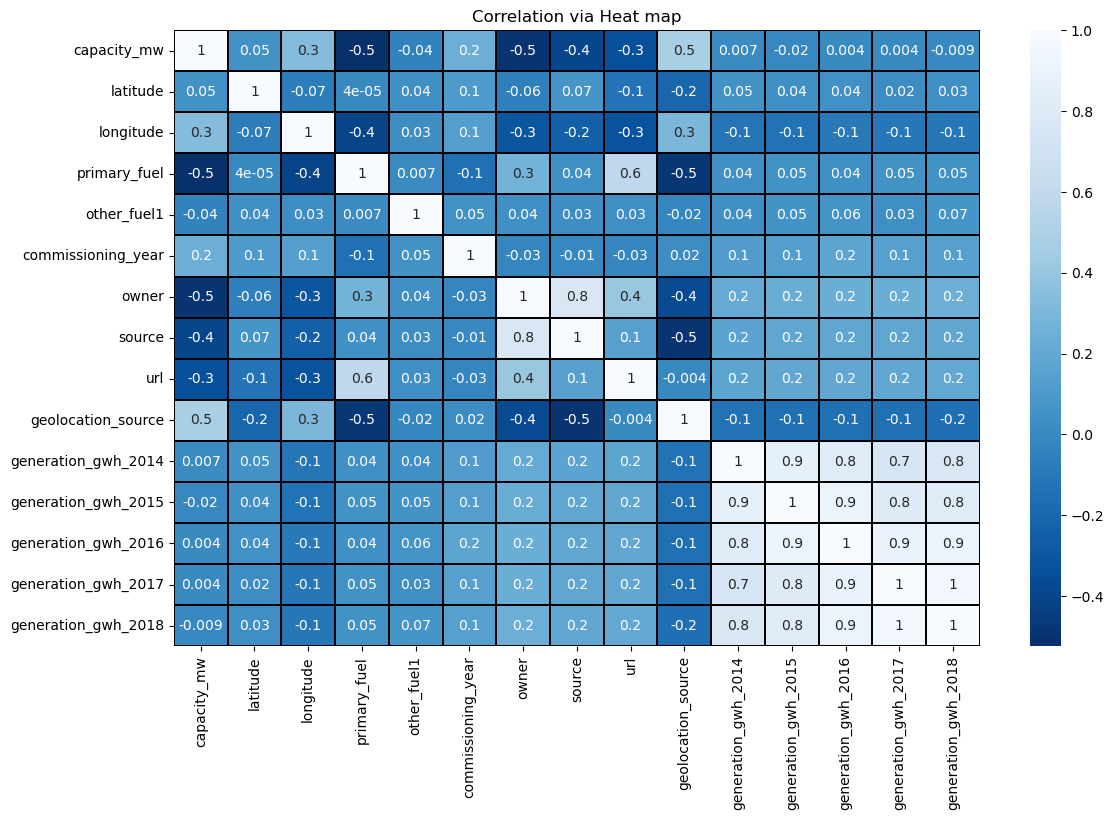

In [117]:
#Visualizing correlation via heat map
plt.figure(figsize=(13,8))
sb.heatmap(cor,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1,fmt='0.1g')
plt.title('Correlation via Heat map')
plt.show()

We can observe the following from this heatmap:  
  
1)**'latitude'** feature **does not have correlation** with **target variable** thus **it can be dropped**.  
      
2)**'other_fuel1', 'owner', 'source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'and 'generation_gwh_2018'** features have **low positive correlation** with **target variable.**  
    
3)**'url'** feature has **moderate positive correlation** with **target variable.**  
      
4)**'capacity_mw', 'longitude' and 'geolocation_source'** features have **moderate negative correlation** with **target variable.** 
  
5)These are the following **pairs with high positive correlation with each other:**  
  
**'generation_gwh_2014' and 'generation_gwh_2018'** features   
**'generation_gwh_2014' and 'generation_gwh_2016'** features  
**'generation_gwh_2014' and 'generation_gwh_2015'** features   
**'generation_gwh_2015' and 'generation_gwh_2018'** features  
**'generation_gwh_2015' and 'generation_gwh_2017'** features   
**'generation_gwh_2015' and 'generation_gwh_2016'** features  
**'generation_gwh_2016' and 'generation_gwh_2018'** features   
**'generation_gwh_2016' and 'generation_gwh_2017'** features     
**'generation_gwh_2017' and 'generation_gwh_2018'** features  

In [118]:
df.drop('latitude',axis=1,inplace=True)#dropping column
df

,capacity_mw,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.232447,0.231159,6,2,2011.000000,228,109,128,1,137.967319,121.666917,113.657459,116.201050,108.648505
1,4.329543,0.231159,1,2,1997.091082,257,174,173,2,137.967319,121.666917,113.657459,116.201050,108.648505
2,3.520920,0.231159,7,2,1997.091082,2,21,205,2,137.967319,121.666917,113.657459,116.201050,108.648505
3,4.609929,0.231159,2,2,2004.000000,5,22,58,2,63.226981,68.085744,65.561648,56.298850,51.306639
4,6.806555,0.231159,1,2,2015.000000,5,22,58,2,156.402932,197.645117,186.312842,173.239485,185.677922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,6.709663,0.231159,1,2,2016.000000,5,22,58,2,137.967319,0.836485,31.625415,65.010430,53.876239
903,1.361445,0.231159,6,2,1997.091082,114,77,22,0,137.967319,121.666917,113.657459,116.201050,108.648505
904,3.140531,0.231159,7,2,1997.091082,5,21,260,2,137.967319,121.666917,113.657459,116.201050,108.648505
905,4.151145,0.231159,1,2,1997.091082,91,59,82,2,137.967319,121.666917,113.657459,116.201050,108.648505


Now the data frame has 14 columns.

In [120]:
#Separating features and target variable 
x=df.drop('primary_fuel',axis=1)
y=df['primary_fuel']    

In [121]:
#checking dimensions of features and label 
print('Dimensions of features:',x.shape,'\nDimensions of label:',y.shape)

Dimensions of features: (849, 13) 
Dimensions of label: (849,)


We can observe that both features and lable have **same number of rows**.  
'x' contains 13 features.

In [122]:
#Importing required library to apply StandardScaler
from sklearn.preprocessing import StandardScaler as sc

sc=sc()#creating instance

x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)#transforming data
x

,capacity_mw,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.676571,-0.928072,0.056132,1.177256,2.014449,1.395536,0.432103,-1.034548,0.327200,0.356092,0.359399,0.360086,0.375133
1,0.228490,-0.509209,0.056132,-0.071731,2.360753,2.818140,1.056786,0.407704,0.327200,0.356092,0.359399,0.360086,0.375133
2,-0.268904,-2.363978,0.056132,-0.071731,-0.684339,-0.530451,1.501005,0.407704,0.327200,0.356092,0.359399,0.360086,0.375133
3,0.400958,2.442106,0.056132,0.548673,-0.648514,-0.508564,-0.539626,0.407704,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585
4,1.752129,1.253969,0.056132,1.536447,-0.648514,-0.508564,-0.539626,0.407704,0.665917,1.898269,1.935543,1.564919,2.122435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,1.692530,0.219861,0.056132,1.626244,-0.648514,-0.508564,-0.539626,0.407704,0.327200,-2.096477,-1.420156,-0.721222,-0.867297
845,-1.597223,0.409525,0.056132,-0.071731,0.653113,0.695177,-1.039372,-2.476800,0.327200,0.356092,0.359399,0.360086,0.375133
846,-0.502886,-0.235273,0.056132,-0.071731,-0.648514,-0.530451,2.264506,0.407704,0.327200,0.356092,0.359399,0.360086,0.375133
847,0.118754,-0.768095,0.056132,-0.071731,0.378458,0.301225,-0.206462,0.407704,0.327200,0.356092,0.359399,0.360086,0.375133


The data is scaled using StandarScaler method to overcome the **issue of biasness.**

In [123]:
#Checking varience inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Importing required library

v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.866493,capacity_mw
1,1.293623,longitude
2,1.027716,other_fuel1
3,1.131036,commissioning_year
4,3.307391,owner
5,2.934635,source
6,1.530163,url
7,1.719224,geolocation_source
8,4.196863,generation_gwh_2014
9,8.033611,generation_gwh_2015


**'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'** features have **high VIF value**, thus posing **multicollinearity problem**. We can **drop 'generation_gwh_2018'** feature as it has the **highest VIF value.** 

In [124]:
x.drop('generation_gwh_2018',axis=1,inplace=True)#Dropping 'generation_gwh_2018' feature
x

,capacity_mw,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.676571,-0.928072,0.056132,1.177256,2.014449,1.395536,0.432103,-1.034548,0.327200,0.356092,0.359399,0.360086
1,0.228490,-0.509209,0.056132,-0.071731,2.360753,2.818140,1.056786,0.407704,0.327200,0.356092,0.359399,0.360086
2,-0.268904,-2.363978,0.056132,-0.071731,-0.684339,-0.530451,1.501005,0.407704,0.327200,0.356092,0.359399,0.360086
3,0.400958,2.442106,0.056132,0.548673,-0.648514,-0.508564,-0.539626,0.407704,-1.046002,-0.731478,-0.683964,-0.905238
4,1.752129,1.253969,0.056132,1.536447,-0.648514,-0.508564,-0.539626,0.407704,0.665917,1.898269,1.935543,1.564919
...,...,...,...,...,...,...,...,...,...,...,...,...
844,1.692530,0.219861,0.056132,1.626244,-0.648514,-0.508564,-0.539626,0.407704,0.327200,-2.096477,-1.420156,-0.721222
845,-1.597223,0.409525,0.056132,-0.071731,0.653113,0.695177,-1.039372,-2.476800,0.327200,0.356092,0.359399,0.360086
846,-0.502886,-0.235273,0.056132,-0.071731,-0.648514,-0.530451,2.264506,0.407704,0.327200,0.356092,0.359399,0.360086
847,0.118754,-0.768095,0.056132,-0.071731,0.378458,0.301225,-0.206462,0.407704,0.327200,0.356092,0.359399,0.360086


**'generation_gwh_2018'** feature is **dropped successfully.**

In [125]:
#re-checking varience inflation factor 
v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.866476,capacity_mw
1,1.292590,longitude
2,1.014765,other_fuel1
3,1.129852,commissioning_year
4,3.306598,owner
5,2.934590,source
6,1.528639,url
7,1.718555,geolocation_source
8,4.160483,generation_gwh_2014
9,8.016849,generation_gwh_2015


**'generation_gwh_2015', 'generation_gwh_2016', and 'generation_gwh_2017'** features still have **high VIF value**. We can **drop 'generation_gwh_2016'** feature as it has the **highest VIF value.** 

In [126]:
x.drop('generation_gwh_2016',axis=1,inplace=True)#Dropping 'generation_gwh_2016' feature
x

,capacity_mw,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017
0,-1.676571,-0.928072,0.056132,1.177256,2.014449,1.395536,0.432103,-1.034548,0.327200,0.356092,0.360086
1,0.228490,-0.509209,0.056132,-0.071731,2.360753,2.818140,1.056786,0.407704,0.327200,0.356092,0.360086
2,-0.268904,-2.363978,0.056132,-0.071731,-0.684339,-0.530451,1.501005,0.407704,0.327200,0.356092,0.360086
3,0.400958,2.442106,0.056132,0.548673,-0.648514,-0.508564,-0.539626,0.407704,-1.046002,-0.731478,-0.905238
4,1.752129,1.253969,0.056132,1.536447,-0.648514,-0.508564,-0.539626,0.407704,0.665917,1.898269,1.564919
...,...,...,...,...,...,...,...,...,...,...,...
844,1.692530,0.219861,0.056132,1.626244,-0.648514,-0.508564,-0.539626,0.407704,0.327200,-2.096477,-0.721222
845,-1.597223,0.409525,0.056132,-0.071731,0.653113,0.695177,-1.039372,-2.476800,0.327200,0.356092,0.360086
846,-0.502886,-0.235273,0.056132,-0.071731,-0.648514,-0.530451,2.264506,0.407704,0.327200,0.356092,0.360086
847,0.118754,-0.768095,0.056132,-0.071731,0.378458,0.301225,-0.206462,0.407704,0.327200,0.356092,0.360086


**'generation_gwh_2016'** feature is **dropped successfully.**

In [127]:
#re-checking varience inflation factor 
v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.866141,capacity_mw
1,1.284876,longitude
2,1.011004,other_fuel1
3,1.116694,commissioning_year
4,3.306234,owner
5,2.934577,source
6,1.527496,url
7,1.717343,geolocation_source
8,4.160257,generation_gwh_2014
9,5.205756,generation_gwh_2015


**'generation_gwh_2015'** feature still have **high VIF value**. We can **drop 'generation_gwh_2015'** feature as it has the **highest VIF value.** 

In [128]:
x.drop('generation_gwh_2015',axis=1,inplace=True)#Dropping 'generation_gwh_2015' feature
x

,capacity_mw,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2017
0,-1.676571,-0.928072,0.056132,1.177256,2.014449,1.395536,0.432103,-1.034548,0.327200,0.360086
1,0.228490,-0.509209,0.056132,-0.071731,2.360753,2.818140,1.056786,0.407704,0.327200,0.360086
2,-0.268904,-2.363978,0.056132,-0.071731,-0.684339,-0.530451,1.501005,0.407704,0.327200,0.360086
3,0.400958,2.442106,0.056132,0.548673,-0.648514,-0.508564,-0.539626,0.407704,-1.046002,-0.905238
4,1.752129,1.253969,0.056132,1.536447,-0.648514,-0.508564,-0.539626,0.407704,0.665917,1.564919
...,...,...,...,...,...,...,...,...,...,...
844,1.692530,0.219861,0.056132,1.626244,-0.648514,-0.508564,-0.539626,0.407704,0.327200,-0.721222
845,-1.597223,0.409525,0.056132,-0.071731,0.653113,0.695177,-1.039372,-2.476800,0.327200,0.360086
846,-0.502886,-0.235273,0.056132,-0.071731,-0.648514,-0.530451,2.264506,0.407704,0.327200,0.360086
847,0.118754,-0.768095,0.056132,-0.071731,0.378458,0.301225,-0.206462,0.407704,0.327200,0.360086


**'generation_gwh_2015'** feature is **dropped successfully.**

In [129]:
#re-checking varience inflation factor 
v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.865048,capacity_mw
1,1.281822,longitude
2,1.009275,other_fuel1
3,1.115437,commissioning_year
4,3.306040,owner
5,2.934549,source
6,1.527449,url
7,1.717272,geolocation_source
8,2.303931,generation_gwh_2014
9,2.358768,generation_gwh_2017


Now the multicollinearity problem is solved.

In [130]:
x.shape#checking shape of x

(849, 10)

Now **'x'** has **10 features**.

In [133]:
y.value_counts()#checking value counts of 'y'

1    235
3    221
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

This shows that this data is imbalanced , to balance data, we can use oversampling method.

In [135]:
#oversampling the data
from imblearn.over_sampling import SMOTE #importing necessary library

sm=SMOTE()#creating instance

x1,y1=sm.fit_resample(x,y)#sampling data

In [136]:
y1.value_counts()#checking value counts of 'y1'

6    235
1    235
7    235
2    235
3    235
0    235
5    235
4    235
Name: primary_fuel, dtype: int64

The data is balanced now.

In [137]:
#checking number of sampled data  
print('Dimensions of features before sampling:',x.shape[0],'\nDimensions of label before sampling:',y.shape[0],'\nDimensions of features after sampling:',x1.shape[0],'\nDimensions of label after sampling:',y1.shape[0],'\nDiffernce = ',x1.shape[0]-x.shape[0])#printing

#Updating features and label
x=x1
y=y1

Dimensions of features before sampling: 849 
Dimensions of label before sampling: 849 
Dimensions of features after sampling: 1880 
Dimensions of label after sampling: 1880 
Differnce =  1031


In [138]:
#Importing libraries
from sklearn.model_selection import train_test_split as tts,cross_val_score as cvs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.svm import SVC as SupportVectorClassifier

In [139]:
#Finding best random state on Random Forest Classifier
ac_updater=0#initilizing variable
rs_updater=0#initilizing variable

for i in range(1,50):#running 'if' loop for 49 times
    
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)#spliting data
    
    RFR=RandomForestClassifier()#creating instance
    
    RFR.fit(x_train,y_train)#fitting data
    pr=RFR.predict(x_test)#predicting data
    
    ac=accuracy_score(y_test,pr)#calculating accuracy score 
    
    if ac>ac_updater:#using if condition to update 'ac_updater' and 'rs_updater' only if 'ac' is greater than 'ac_updater'
        #updating values
        ac_updater=ac
        rs_updater=i

print('Max accuracy score during the iteration is ',ac_updater,'on randome state : ',rs_updater)#printing

Max accuracy score during the iteration is  0.9343971631205674 on randome state :  37


In [140]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=rs_updater)#Spliting data on the best random state

In [141]:
#Creating instance of  various models
LR=LogisticRegression()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
BC=BaggingClassifier()
SVC=SupportVectorClassifier()

models=[LR,RFC,ETC,GBC,ABC,BC,SVC]#Creating list containing the instances of the models

log=float('inf')#Initializing 'log' variable  to positive infinity
    
for i in models:#Iterating models 
    
    i.fit(x_train,y_train)#fitting data 
    pr=i.predict(x_test)#predicting data
    
    A_score=accuracy_score(y_test,pr)#calculating accuracy  score
    C_matrix=confusion_matrix(y_test,pr)#calculating confusion matrix
    C_report=classification_report(y_test,pr)#calculating classification report
    
    score=cvs(i,x,y)#calculating Cross Validation Score
    diff=abs(A_score - score.mean())*100  #calculating difference of accuracy score and Cross Validation Score
    
    #Printing    
    print('\n','Accuracy score of',str(i).split('(')[0],'is',A_score,'\n','\nConfusion matrix of',str(i).split('(')[0],':\n',C_matrix,'\nClassification report of ',str(i).split('(')[0],':\n',C_report,'\n')
    print('\nCross validation Score of',str(i).split('(')[0],'is',score,'\nMean: ',score.mean(),'\nDifference between Accuracy score and cross validation is ',diff)

    if diff<log and score.mean()>=0:#Using two condition to execute the following codes i.e. when log is greater than diff and mean of score in not negative
        
        log=diff#Updating 'log' variable if condition is True
        b_d=diff#Storing difference to 'b_d' variable in context to  the corresponding iteration 
        model=str(i).split('(')[0]#Storing model name to 'model' variable in context to  the corresponding iteration

print(f'\n\n{model} is the best model with least difference between accuracy score and cross validation i.e {b_d}')#Printing 


 Accuracy score of LogisticRegression is 0.7801418439716312 
 
Confusion matrix of LogisticRegression :
 [[61  0  0  1  0  1  0  0]
 [ 9 25  9  4 14  3  0  2]
 [ 2  9 40  6  3  8  0  3]
 [ 2  6 11 37  1  8  0  0]
 [ 0  1  0  6 61  0  0  0]
 [ 4  3  4  2  0 69  0  2]
 [ 0  0  0  0  0  0 75  0]
 [ 0  0  0  0  0  0  0 72]] 
Classification report of  LogisticRegression :
               precision    recall  f1-score   support

           0       0.78      0.97      0.87        63
           1       0.57      0.38      0.45        66
           2       0.62      0.56      0.59        71
           3       0.66      0.57      0.61        65
           4       0.77      0.90      0.83        68
           5       0.78      0.82      0.80        84
           6       1.00      1.00      1.00        75
           7       0.91      1.00      0.95        72

    accuracy                           0.78       564
   macro avg       0.76      0.77      0.76       564
weighted avg       0.77      0.7

Here by comparing difference of accuracy score and cross validation  of various models, we can conclude that **SupportVectorClassifier is the best performing model** as it has the least difference between accuracy score and cross validation than the rest of the models.

In [144]:
#Using GridSearchCV  for hyperparameter tuning
from sklearn.model_selection import GridSearchCV as GSC#Importing required library

pa={'shrinking':[True,False],'gamma':['gini','auto'],'C':[0.1,1,10],'kernel':['linear','poly','rbf','sigmoid'],'probability':[True,False]}#defining hyper parameters

gsc=GSC(SVC,pa)#creating instance

gsc.fit(x_train,y_train)#fitting data
gsc.best_params_#fetching best parameters

{'C': 10,
 'gamma': 'auto',
 'kernel': 'rbf',
 'probability': True,
 'shrinking': True}

In [146]:
#Applying best parameters provided by GridSearchCV
final=SupportVectorClassifier(C=10,gamma='auto',shrinking=True,probability=True,kernel='rbf')

In [147]:
final.fit(x_train,y_train)#fitting data 
pr=final.predict(x_test)#predicting data

ac=accuracy_score(y_test,pr)
print(ac)

0.8900709219858156


Model's accuracy score is increased from 82% to 89%.

In [148]:
#Conclusion
Predicted_values=final.predict(x_test)#storing predicted values in 'Predicted_values' variable
Original_values=y_test#storing original values in 'Original_values' variable

#creating new data frame with Predicted and Original values
conclusion=pd.DataFrame({'Predicted Values':Predicted_values,'Original Values':Original_values})

In [149]:
con=pd.DataFrame(data=enc_pf)#creating new data frame contaning data of 'enc_pf' data frame

con.drop_duplicates(subset='primary_fuel',inplace=True)#dropping duplicate values based on 'primary_fuel' column
con.reset_index(drop=True,inplace=True)#reseting index
con

,primary_fuel,encoded_primary_fuel
0,Solar,6
1,Coal,1
2,Wind,7
3,Gas,2
4,Hydro,3
5,Biomass,0
6,Oil,5
7,Nuclear,4


In [152]:
for i in range(0,8):#running loop for 8 times
    
    Encoded_Value=con.loc[i,'encoded_primary_fuel']#storing encoded value present at 'i' index of 'con' data frame
    Original_Value=con.loc[i,'primary_fuel']#storing original value present at 'i' index of 'con' data frame
    
    conclusion.replace(Encoded_Value,Original_Value,inplace=True)#replacing encoded values with original values

In [154]:
conclusion.sample(20)

,Predicted Values,Original Values
132,Coal,Coal
766,Coal,Coal
778,Wind,Wind
1630,Oil,Oil
1292,Nuclear,Nuclear
631,Wind,Wind
705,Solar,Solar
1611,Gas,Oil
903,Biomass,Biomass
1440,Nuclear,Nuclear


Here we can conclude that the model predicted values are close enough to the original values. 

In [156]:
#Saving the model
import joblib
joblib.dump(final,r'D:\Models\GPPD_C.obj')

['D:\\Models\\GPPD_C.obj']